
| **`Column Name`:**              | **`Description`:** |
|--------------------------|-------------|
| `country`                | The name of the country where the data point was recorded. |
| `year`                   | The year the data was recorded (ranging from 1985 to 2016). |
| `sex`                    | The gender of the individuals (values: `male` or `female`). |
| `age`                    | The age group of the individuals (e.g., `15-24 years`, `35-54 years`, `75+ years`, etc.). |
| `suicides_no`            | The **total number of suicides** reported in that country, year, gender, and age group. |
| `population`             | The **total population** of that specific demographic group (country, year, sex, and age group). |
| `suicides/100k pop`      | The **suicide rate** per 100,000 people in the demographic group. This is a normalized value to allow for comparisons between populations of different sizes. |
| `country-year`           | A combined field used as a unique identifier in the format `"Country-Year"` (e.g., `India-2010`). |
| `HDI for year`           | The **Human Development Index (HDI)** for the country in that particular year. It is a composite index measuring average achievement in key dimensions of human development: life expectancy, education, and per capita income.  |
| ` gdp_for_year ($) `     | The **total GDP (Gross Domestic Product)** of the country for that year. |
| `gdp_per_capita ($)`     | The **GDP per capita**, i.e., GDP divided by the total population of the country for that year. |
| `generation`             | The **generation category** of the age group, such as `Generation Z`, `Millennials`, `Generation X`, etc. This adds a sociological dimension to the age data. |

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [ ]:
# List out all the available plot styles in metplotlib and seaborn:
plt.style.available

In [ ]:
# Set the style
plt.style.use('seaborn-v0_8-bright')
# Set themes
sns.set_theme()

In [2]:
from data_preparation import data_loader
data= data_loader()

In [3]:
data.shape

(27820, 13)

In [4]:
data.head()

country  year     sex     age  suicides_no  population  suicides/100kpop  \
0  Albania  1987    male  15-24            21      312900              6.71   
1  Albania  1987    male  35-54            16      308000              5.19   
2  Albania  1987  female  15-24            14      289700              4.83   
3  Albania  1987    male    75+             1       21800              4.59   
4  Albania  1987    male  25-34             9      274300              3.28   

   country-year  HDIforyear  gdp_for_year()  gdp_per_capita()  \
0  Albania-1987    0.828088      2156624900               796   
1  Albania-1987    0.828088      2156624900               796   
2  Albania-1987    0.828088      2156624900               796   
3  Albania-1987    0.828088      2156624900               796   
4  Albania-1987    0.828088      2156624900               796   

        generation continent  
0     Generation X    Europe  
1           Silent    Europe  
2     Generation X    Europe  
3  G.I. Generation    Europe  
4          Boomers    Europe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           27820 non-null  object 
 1   year              27820 non-null  int64  
 2   sex               27820 non-null  object 
 3   age               27820 non-null  object 
 4   suicides_no       27820 non-null  int64  
 5   population        27820 non-null  int64  
 6   suicides/100kpop  27820 non-null  float64
 7   country-year      27820 non-null  object 
 8   HDIforyear        27820 non-null  float64
 9   gdp_for_year()    27820 non-null  int64  
 10  gdp_per_capita()  27820 non-null  int64  
 11  generation        27820 non-null  object 
 12  continent         27820 non-null  object 
dtypes: float64(2), int64(5), object(6)
memory usage: 2.8+ MB


## **A. DESCRIPTIVE ANALYSIS:**

### **1. Total Suicides by Year:**

In [6]:
sus_year= data.groupby(by= "year")["suicides_no"].sum().reset_index()
sus_year

year  suicides_no
0   1985       116063
1   1986       120670
2   1987       126842
3   1988       121026
4   1989       160244
5   1990       193361
6   1991       198020
7   1992       211473
8   1993       221565
9   1994       232063
10  1995       243544
11  1996       246725
12  1997       240745
13  1998       249591
14  1999       256119
15  2000       255832
16  2001       250652
17  2002       256095
18  2003       256079
19  2004       240861
20  2005       234375
21  2006       233361
22  2007       233408
23  2008       235447
24  2009       243487
25  2010       238702
26  2011       236484
27  2012       230160
28  2013       223199
29  2014       222984
30  2015       203640
31  2016        15603

<Axes: xlabel='year', ylabel='suicides_no'>

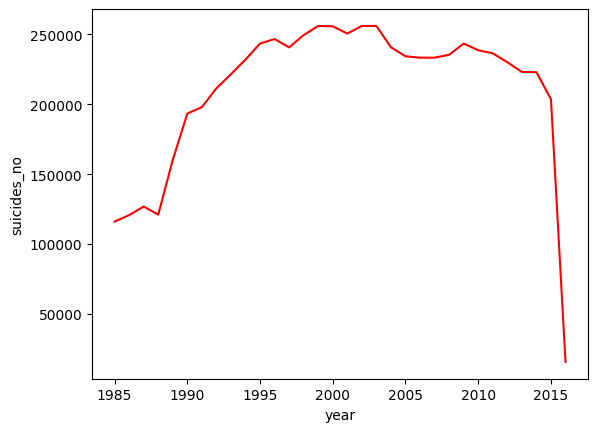

In [7]:
sns.lineplot(data= sus_year, x= "year", y= "suicides_no",color= "red")

This plot shows the global trend of total suicides (`suicides_no`) over the years (1985–2016).

- There is a significant increase in the total number of suicides from 1985 to around 2000. This could indicate worsening mental health conditions, better reporting mechanisms, or population growth or something else.

- From 2000 to 2010, the total suicides appear relatively stable, with minor fluctuations. This might suggest stagnation in addressing the issue or consistent reporting.

- A steep drop is observed after 2010, especially around 2015. This could be due to incomplete data for recent years, changes in reporting practices, or actual improvements in mental health interventions or some other factors.

**Two questions we have to answer:** 
1. Reasons or factors contributing to Sudden increase in number of suicides from 1985-2000.

2. Reasons of steep decline in the number of suicides after 2010.

<Axes: xlabel='year'>

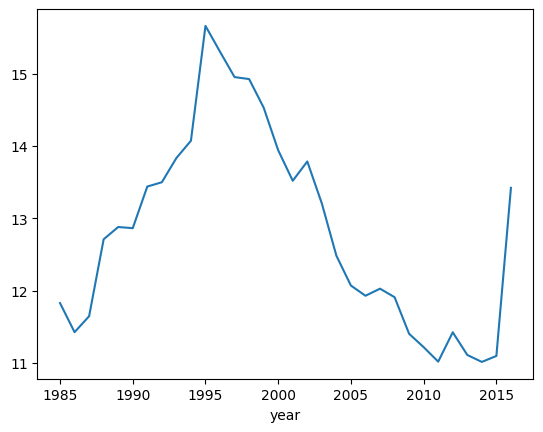

In [8]:
# Suicides per 100000 population:
nor_da= data.groupby("year")["suicides/100kpop"].mean()
sns.lineplot(x= nor_da.index, y= nor_da.values)

This plot shows the average suicide rate per 100,000 population (suicides/100k pop) over the years (1985–2016). 

The suicide rate per 100,000 population rises steadily from 1985, peaking around 2000 aligning with the earlier plot of total suicides, suggesting that the increase in suicides was not solely due to population growth but also a rise in the rate.

The rate begins to decline after 2000, with a significant drop between 2005 and 2010. But a sudden spike is observed after 2015,which was not seen in the previous plot.

Also, total suicides plot shows a sharp decline after 2010, while this plot shows a more gradual decline in the rate.

### 2. **Suicide Rate by Sex:**

In [9]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [10]:
data["sex"].unique()

array(['male', 'female'], dtype=object)

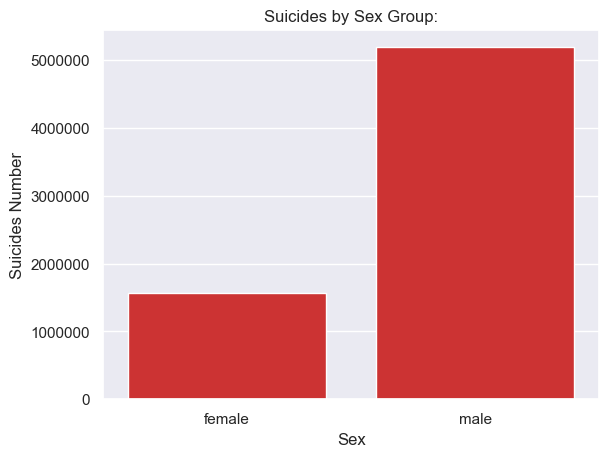

In [11]:
import matplotlib.ticker as mticker

sns.set_theme(style= "darkgrid")
data.groupby(by= "sex")["suicides_no"].sum()
sns.barplot(x= data.groupby(by= "sex")["suicides_no"].sum().index, y= data.groupby(by= "sex")["suicides_no"].sum().values, color= "Red", saturation= 0.6)
plt.xlabel("Sex")
plt.ylabel("Suicides Number")
plt.title("Suicides by Sex Group:")
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

This plot shows the total `suicides number` according to `Sex`(`Female` and `Male`) for the whole dataset we have from `1985-2016`. 

This shows there is significantly high suicides in Males population compared to Females. This about 3 times more in Males compared to Females.

<Axes: xlabel='sex', ylabel='suicides/100kpop'>

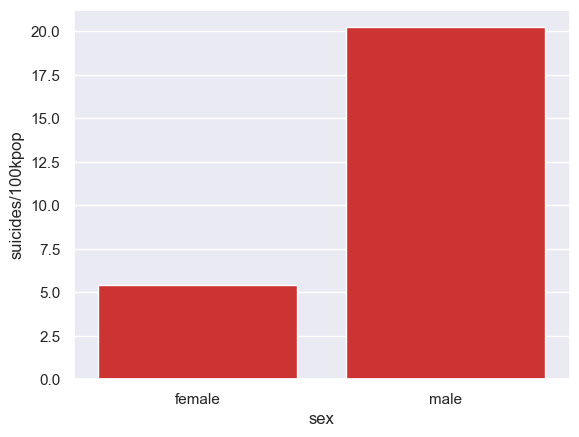

In [12]:
su_age= data.groupby(by= "sex")["suicides/100kpop"].mean().reset_index()
sns.barplot(data= su_age, x= "sex", y= "suicides/100kpop", color= "red", saturation= 0.6)

If we plot the suicides per 100k population for sex groups, it also shows that males suicide rate is significantly high (about 4 times) compared to females.

### 3. **Suicides by Age Group:**
- **How:** Group by `age`, sum `suicides_no`.
- **Inference:** Shows which age groups are most at risk; elderly and young adults often show patterns.


In [13]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [14]:
su_age= data.groupby(by= "age")["suicides_no"].sum().reset_index().sort_values(by= "suicides_no")
su_age

age  suicides_no
3   5-14         52264
5    75+        653118
0  15-24        808542
1  25-34       1123912
4  55-74       1658443
2  35-54       2452141

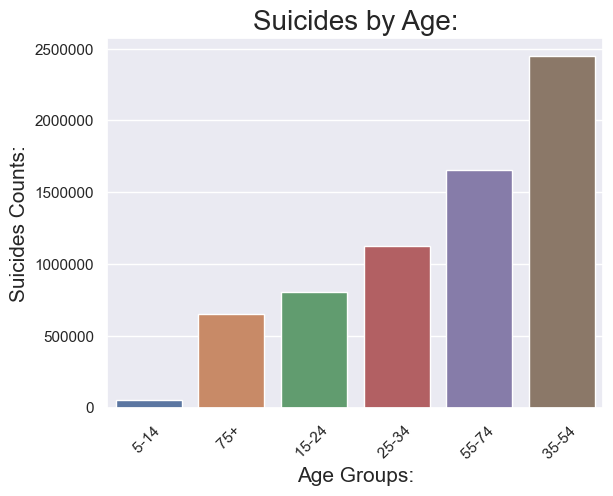

In [15]:
import matplotlib.pyplot as plt
sns.barplot(data= su_age, x= "age", y= "suicides_no", palette= "deep",saturation= 0.7, hue= "age", legend=False)
plt.title("Suicides by Age:", fontsize= 20)
plt.xlabel("Age Groups:", fontsize= 15)
plt.ylabel("Suicides Counts:", fontsize= 15)
plt.xticks(rotation= 45)   

plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.show()

- The `35–54` years age group has the highest number of suicides, indicating that middle-aged individuals are at the greatest risk. This could be due to factors like `work-related stress`, `financial pressures`, or `midlife crises`.

- The `55–74` years age group follows, suggesting that older adults also face significant challenges, possibly related to `health issues`, `loneliness`, or `retirement`.

- The `5–14` years age group has the lowest number of suicides, which is expected as children are generally less exposed to the stressors that lead to suicide.

- Middle-aged individuals (`35–54` years) are at the highest risk and should be a primary focus for mental health interventions. Older adults (`55–74` years) also require targeted support, especially for issues like isolation and health-related challenges.

- Young adults (`15–34` years) need attention for stress management and coping mechanisms, particularly in academic and early career stages.

<Axes: xlabel='age', ylabel='suicides/100kpop'>

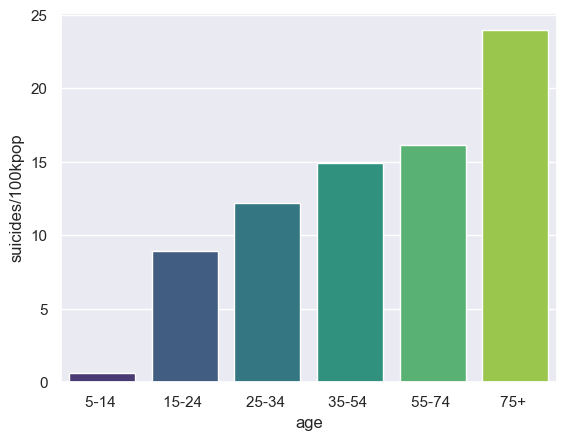

In [16]:
sus_by_100= data.groupby(by= "age")["suicides/100kpop"].mean().reset_index().sort_values(by= "suicides/100kpop")
sns.barplot(data= sus_by_100, x= "age", y= "suicides/100kpop", palette= "viridis", hue= "age", legend= False, )

This shows the **suicide rate per 100,000 population (`suicides/100kpop`)** across different **age groups**.

- The age group `75+` has the highest suicide rate, exceeding 20 suicides per 100,000 population. This suggests that elderly individuals are at the greatest risk. 

- The `35-54` and `55-74` age groups also show high suicide rates, around 15-20 suicides per 100,000 population. These groups may face challenges like work-related stress, financial pressures, or health-related issues.

- The `25-34` group has a moderate suicide rate, slightly above 10 per 100,000 population. The `15-24` group has a lower rate, around 10 per 100,000 population, but still significant, possibly due to academic or early career stress.

- The `5-14` age group has the lowest suicide rate, close to 0. This is expected, as children are generally less exposed to the stressors that lead to suicide.

> - ```Suicide rates increase with age, peaking in the elderly (`75+` years).```

> - ```Middle-aged and older adults require targeted mental health interventions.```

> - ```Young adults also need support, particularly for stress management and coping mechanisms.```

### 4. **Top Countries with Highest Suicide Rates:**

In [17]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [18]:
chsr= data.groupby(by= "country")["suicides/100kpop"].mean().reset_index().sort_values(by= "suicides/100kpop", ascending= False).round(5)
chsr_10= chsr.head(10)
chsr_10

country  suicides/100kpop
52           Lithuania          40.41557
87           Sri Lanka          35.29515
75  Russian Federation          34.89238
40             Hungary          32.76152
11             Belarus          31.07591
47          Kazakhstan          30.51128
51              Latvia          29.25933
84            Slovenia          27.82786
30             Estonia          27.27690
95             Ukraine          26.58232

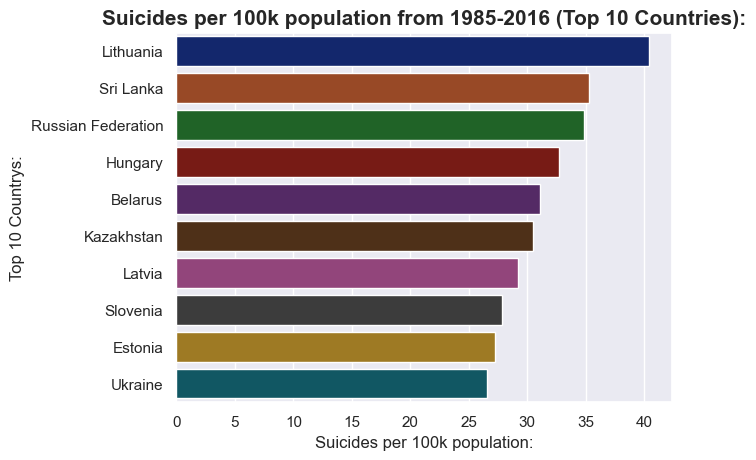

In [19]:
sns.barplot(data= chsr_10, x= "suicides/100kpop", y= "country", hue= "country", palette= "dark", legend= False, saturation= 0.7)
plt.title("Suicides per 100k population from 1985-2016 (Top 10 Countries):", fontsize= 15, fontweight= "bold")
plt.xlabel("Suicides per 100k population:", fontsize= 12)
plt.ylabel("Top 10 Countrys:", fontsize= 12)
plt.show()

`Lithuania` have the higest suicide rate per 100k population followed by `Sri Lanka`, `Russia` and `Hungary`.

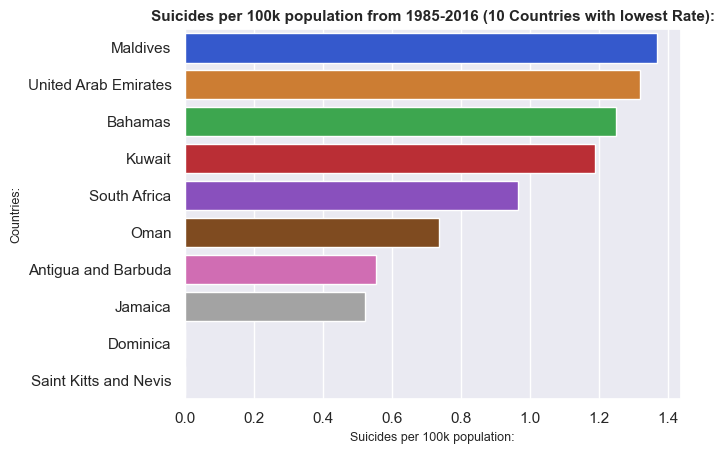

In [20]:
sns.barplot(data= chsr.tail(10), x= "suicides/100kpop", y= "country", hue= "country", palette= "bright", legend= False, saturation= 0.6)
plt.title("Suicides per 100k population from 1985-2016 (10 Countries with lowest Rate):", fontsize= 11, fontweight= "bold")
plt.xlabel("Suicides per 100k population:", fontsize= 9)
plt.ylabel("Countries:", fontsize= 9)
plt.show()

`Dominicia` and, `Saint Kitts and Navis` have the lowest Suicides rates, almost zero per 100k population.

In [21]:
sas= data.groupby(by= "country")["suicides_no"].mean().reset_index().sort_values(by= "suicides_no", ascending= False).round(2)
sas

country  suicides_no
75     Russian Federation      3733.77
98          United States      2779.60
46                  Japan      2169.09
95                Ukraine       952.23
35                Germany       933.53
..                    ...          ...
37                Grenada         0.12
79             San Marino         0.11
1     Antigua and Barbuda         0.03
27               Dominica         0.00
76  Saint Kitts and Nevis         0.00

[101 rows x 2 columns]

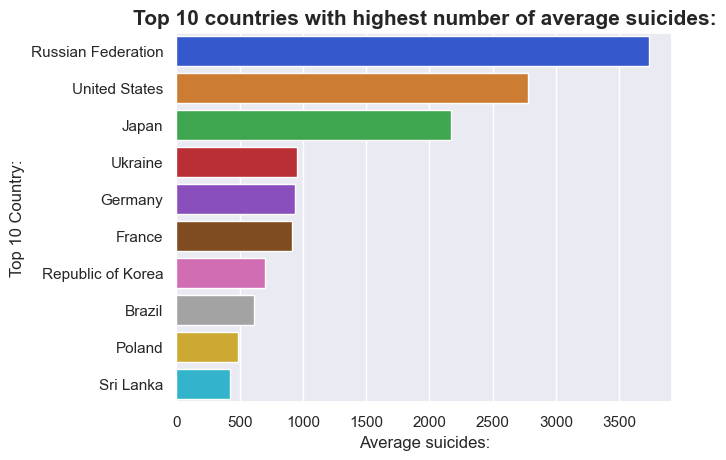

In [22]:
sns.barplot(data= sas.head(10), x= "suicides_no", y= "country", palette= "bright", hue= "country", legend= False, saturation= 0.6)
plt.title("Top 10 countries with highest number of average suicides:", fontsize= 15, fontweight= "bold")
plt.xlabel("Average suicides:", fontsize= 12)
plt.ylabel("Top 10 Country:", fontsize= 12)
plt.show()

If we analyze the data according to `suicides_no` without population consideration, then, `Russia` has the higest number of suicides records followed by `USA`, `Japan` and `Ukrain`.

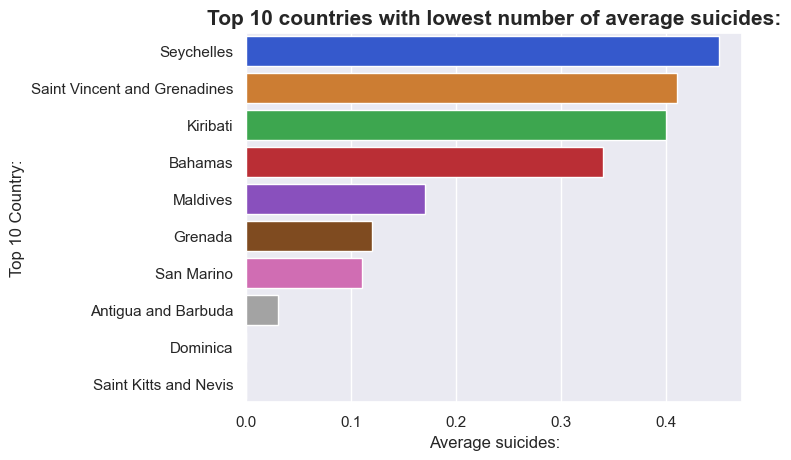

In [23]:
sns.barplot(data= sas.tail(10), x= "suicides_no", y= "country", palette= "bright", hue= "country", legend= False, saturation= 0.6)
plt.title("Top 10 countries with lowest number of average suicides:", fontsize= 15, fontweight= "bold")
plt.xlabel("Average suicides:", fontsize= 12)
plt.ylabel("Top 10 Country:", fontsize= 12)
plt.show()

And, `Antigua and Barbuda`, `Dominica`, `Saint Kitts and Navis` have the lowest number of suicides without considering the population size.

It is more reliable to analyze the `suicides rates with population size consideration` rather than `using only the number of suicides per country`.

### 5. **Bottom Countries with Lowest Suicide Rates:**

In [24]:
chsr= chsr.sort_values(by= "suicides/100kpop", ascending= True)

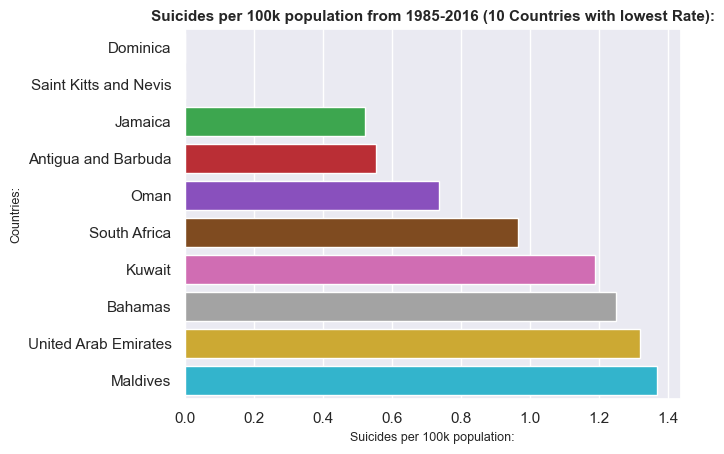

In [25]:
sns.barplot(data= chsr.head(10), x= "suicides/100kpop", y= "country", hue= "country", palette= "bright", legend= False, saturation= 0.6)
plt.title("Suicides per 100k population from 1985-2016 (10 Countries with lowest Rate):", fontsize= 11, fontweight= "bold")
plt.xlabel("Suicides per 100k population:", fontsize= 9)
plt.ylabel("Countries:", fontsize= 9)
plt.show()

`Sant Kitts and Nevis` and, `Dominica` have 0.00 rate of suicides per 100k population. according to 2023 data, `Saint Kitts and Nevis` had a population of approximately `52,321`, while `Dominica` had a population of roughly `73,000`.  

The low suicide rates in `Saint Kitts and Nevis` and `Dominica` can be attributed to several factors:

1. **Strong Community Ties:**    
    Both countries have close-knit communities where social support is prevalent. Strong family and community bonds can provide emotional and psychological support to individuals in distress.

2. **Cultural Influences:**      
    Cultural norms in these nations often emphasize resilience, community solidarity, and a collective approach to problem-solving, which can help mitigate feelings of isolation.

3. **Religious and Spiritual Beliefs:**    
    High levels of religious affiliation and spiritual practices in the Caribbean can offer comfort and hope, encouraging individuals to seek help and maintain a positive outlook.

4. **Access to Mental Health Resources:**    
    While resources may be limited, there is a growing awareness of mental health issues, and initiatives to improve access to mental health support can contribute to lower suicide rates.

5. **Economic Factors:**   
    Although both countries face economic challenges, the reliance on tourism and community support systems may buffer against extreme financial distress, which is often linked to higher suicide rates.

----
----

## **B. TEMPORAL/TREND ANALYSIS:**

### 6. **Trend of Suicides over the Years per Country:**

In [26]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [27]:
data.groupby(by= "country")["suicides_no"].sum().reset_index()

country  suicides_no
0                 Albania         1970
1     Antigua and Barbuda           11
2               Argentina        82219
3                 Armenia         1905
4                   Aruba          101
..                    ...          ...
96   United Arab Emirates          622
97         United Kingdom       136805
98          United States      1034013
99                Uruguay        13138
100            Uzbekistan        34803

[101 rows x 2 columns]

In [28]:
a= data.groupby(by= "country")["suicides_no"].sum().reset_index().sort_values(by= "suicides_no", ascending= False)
a

country  suicides_no
75     Russian Federation      1209742
98          United States      1034013
46                  Japan       806902
33                 France       329127
95                Ukraine       319950
..                    ...          ...
55               Maldives           20
1     Antigua and Barbuda           11
79             San Marino            4
27               Dominica            0
76  Saint Kitts and Nevis            0

[101 rows x 2 columns]

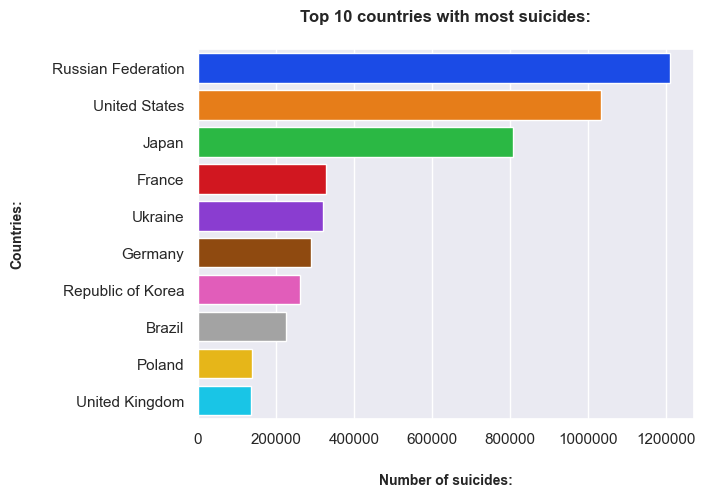

In [29]:
sns.barplot(data= a.head(10), y= "country", x= "suicides_no", hue= "country", legend= False, palette="bright", saturation=0.8)
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.title("Top 10 countries with most suicides:", fontweight= "bold", pad= 20)
plt.xlabel("Number of suicides:", fontweight= "bold", labelpad= 20, fontsize= 10)
plt.ylabel("Countries:", fontweight= "bold", labelpad= 20, fontsize= 10)
plt.show()

This plot shows number of average suicides per country showing `Russia`, `USA`, `Japan` and `France` topping the list. This does not include the population into consideration.

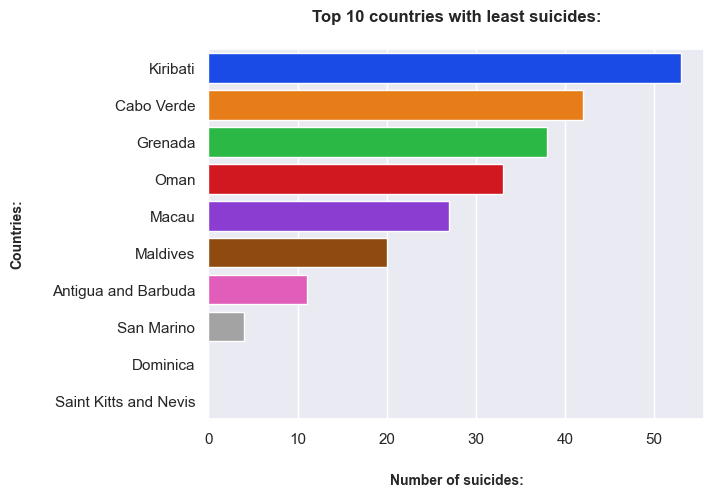

In [30]:
sns.barplot(data= a.tail(10), y= "country", x= "suicides_no", hue= "country", legend= False, palette="bright", saturation=0.8)
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().xaxis.get_major_formatter().set_scientific(False)
plt.title("Top 10 countries with least suicides:", fontweight= "bold", pad= 20)
plt.xlabel("Number of suicides:", fontweight= "bold", labelpad= 20, fontsize= 10)
plt.ylabel("Countries:", fontweight= "bold", labelpad= 20, fontsize= 10)
plt.show()

This shows that again `Saint Kitts and Nevis`, `Dominica` and `San Marino`; West Indian Islantic countries have the least suicide rate where `Saint Kitts and Nevis`, `Dominica` having almost no suicides.

In [31]:
daar= data.groupby(by= "country")["suicides/100kpop"].mean().reset_index().sort_values(by= "suicides/100kpop", ascending= False)
daar

country  suicides/100kpop
52              Lithuania         40.415573
87              Sri Lanka         35.295152
75     Russian Federation         34.892377
40                Hungary         32.761516
11                Belarus         31.075913
..                    ...               ...
65                   Oman          0.736111
1     Antigua and Barbuda          0.552901
45                Jamaica          0.521765
27               Dominica          0.000000
76  Saint Kitts and Nevis          0.000000

[101 rows x 2 columns]

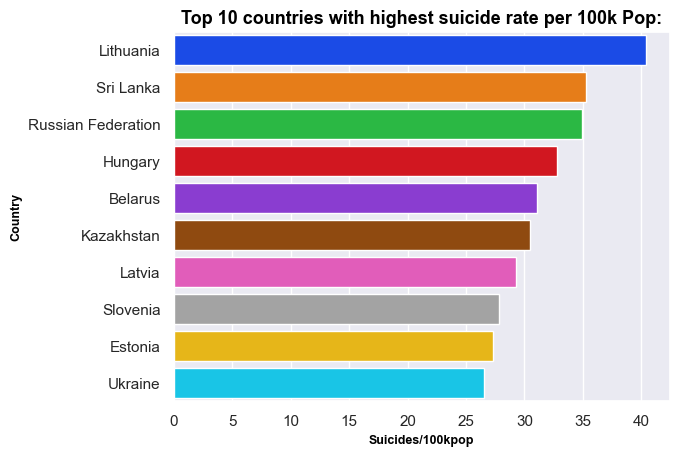

In [32]:
sns.barplot(data= daar.head(10), x= "suicides/100kpop", y= "country", hue= "country", palette= "bright", legend= False, saturation=0.8)
plt.title("Top 10 countries with highest suicide rate per 100k Pop:", fontsize= 13, fontweight= "bold", color= "black")
plt.xlabel("Suicides/100kpop", fontsize= 9, fontweight= "bold", color= "black")
plt.ylabel("Country", fontsize= 9, fontweight= "bold", color= "black")
plt.show()

This plot shows that `Lithuania`, `Sri Lanka`, `Russia` and `Hungary` have the most higest suicide rate per 100k population. 

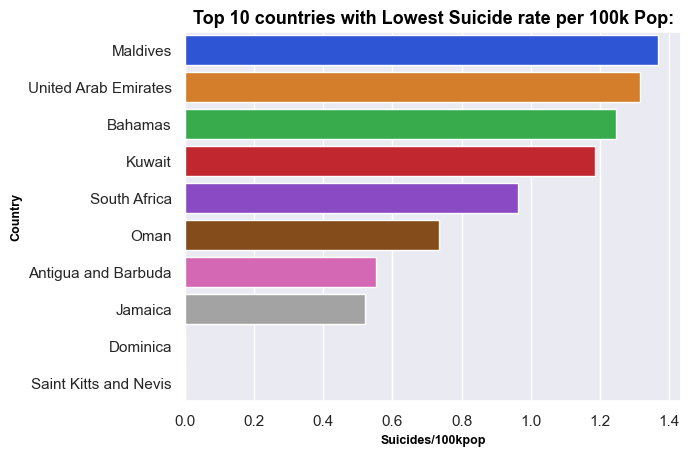

In [33]:
sns.barplot(data= daar.tail(10), x= "suicides/100kpop", y= "country", hue= "country", palette= "bright", legend= False, saturation=0.66)
plt.title("Top 10 countries with Lowest Suicide rate per 100k Pop:", fontsize= 13, color= "black", fontweight= "bold",)
plt.xlabel("Suicides/100kpop", fontsize= 9, fontweight= "bold", color= "black")
plt.ylabel("Country", fontsize= 9, fontweight= "bold", color= "black")
plt.show()

This shows that `Saint Kitts Nevis` and `Dominica` have very low (almost zero) suicide rate per 100k population. 

In [34]:
pivt= data.groupby(by= ["year", "country"])["suicides/100kpop"].mean().round(2).reset_index().sort_values(by= "year", ascending= True)
pivt.head()

year              country  suicides/100kpop
0   1985  Antigua and Barbuda              0.00
17  1985               Greece              4.85
18  1985              Grenada              2.09
19  1985              Iceland             14.25
20  1985              Ireland              8.51

In [35]:
pivt["country"].unique()

array(['Antigua and Barbuda', 'Greece', 'Grenada', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Spain', 'Austria', 'Bahamas',
       'Bahrain', 'Barbados', 'Belgium', 'Brazil', 'Argentina', 'Japan',
       'New Zealand', 'Netherlands', 'Mexico', 'Mauritius', 'Malta',
       'Luxembourg', 'Kuwait', 'Panama', 'Canada', 'Colombia', 'Chile',
       'Dominica', 'Ecuador', 'France', 'Costa Rica', 'Paraguay',
       'Portugal', 'Puerto Rico', 'Republic of Korea',
       'Saint Vincent and Grenadines', 'Seychelles', 'Singapore',
       'Bulgaria', 'Australia', 'Thailand', 'Suriname', 'United Kingdom',
       'United States', 'Uruguay', 'Trinidad and Tobago', 'Sri Lanka',
       'Saint Lucia', 'Norway', 'Belize', 'Guatemala', 'Albania',
       'Finland', 'Sweden', 'Ukraine', 'Turkmenistan', 'Guyana',
       'Russian Federation', 'Romania', 'Belarus', 'Azerbaijan',
       'Uzbekistan', 'Saint Kitts and Nevis', 'Poland', 'Armenia',
       'Germany', 'Georgia', 'El Salvador', 'Czech

Now, we can access the data for a particular `Country` for a particular `year`. For Example in `2016`, the suicides/100k pop in `US` can be obtained as:

In [36]:
pivt[(pivt["country"]== "United States") & (pivt["year"]== 2015)]

year        country  suicides/100kpop
2303  2015  United States             14.62

In [37]:
pivt[(pivt["country"]== "Denmark") & (pivt["year"]== 2011)]

year  country  suicides/100kpop
1941  2011  Denmark             10.53

In [38]:
pvt= pivt.groupby(by= ["country", "year"])["suicides/100kpop"].mean().round(2).reset_index()
pvt

country  year  suicides/100kpop
0        Albania  1987              2.65
1        Albania  1988              2.70
2        Albania  1989              2.78
3        Albania  1992              1.50
4        Albania  1993              2.71
...          ...   ...               ...
2316  Uzbekistan  2010              5.27
2317  Uzbekistan  2011              5.60
2318  Uzbekistan  2012              6.46
2319  Uzbekistan  2013              6.57
2320  Uzbekistan  2014              7.09

[2321 rows x 3 columns]

In [39]:
pvt[pvt["country"]== "Albania"]

country  year  suicides/100kpop
0   Albania  1987              2.65
1   Albania  1988              2.70
2   Albania  1989              2.78
3   Albania  1992              1.50
4   Albania  1993              2.71
5   Albania  1994              2.68
6   Albania  1995              3.38
7   Albania  1996              3.64
8   Albania  1997              6.45
9   Albania  1998              5.54
10  Albania  1999              5.82
11  Albania  2000              2.56
12  Albania  2001              4.22
13  Albania  2002              5.21
14  Albania  2003              4.88
15  Albania  2004              5.45
16  Albania  2005              0.00
17  Albania  2006              0.00
18  Albania  2007              5.49
19  Albania  2008              5.92
20  Albania  2009              0.00
21  Albania  2010              3.47

<Axes: xlabel='year', ylabel='suicides/100kpop'>

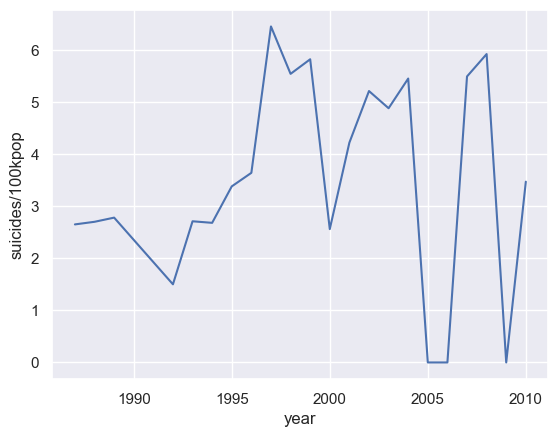

In [40]:
sns.lineplot(x= pvt[pvt["country"]== "Albania"]["year"], y= pvt[pvt["country"]== "Albania"]["suicides/100kpop"], legend= True)

<Axes: xlabel='year', ylabel='suicides/100kpop'>

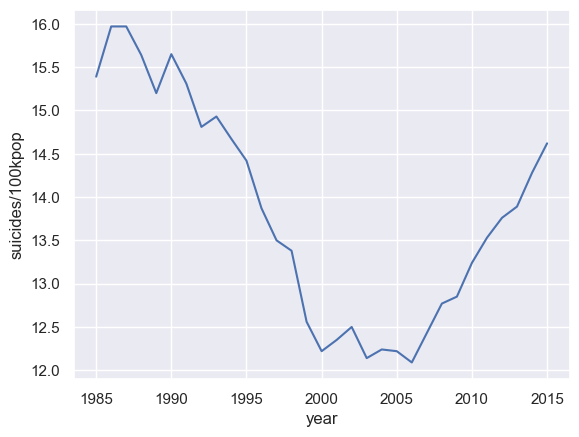

In [41]:
sns.lineplot(x= pvt[pvt["country"]== "United States"]["year"], y= pvt[pvt["country"]== "United States"]["suicides/100kpop"], legend= True)

If we want to plot all the yearly trend of suicide rates per country then:

In [42]:
data["country"].nunique()

101

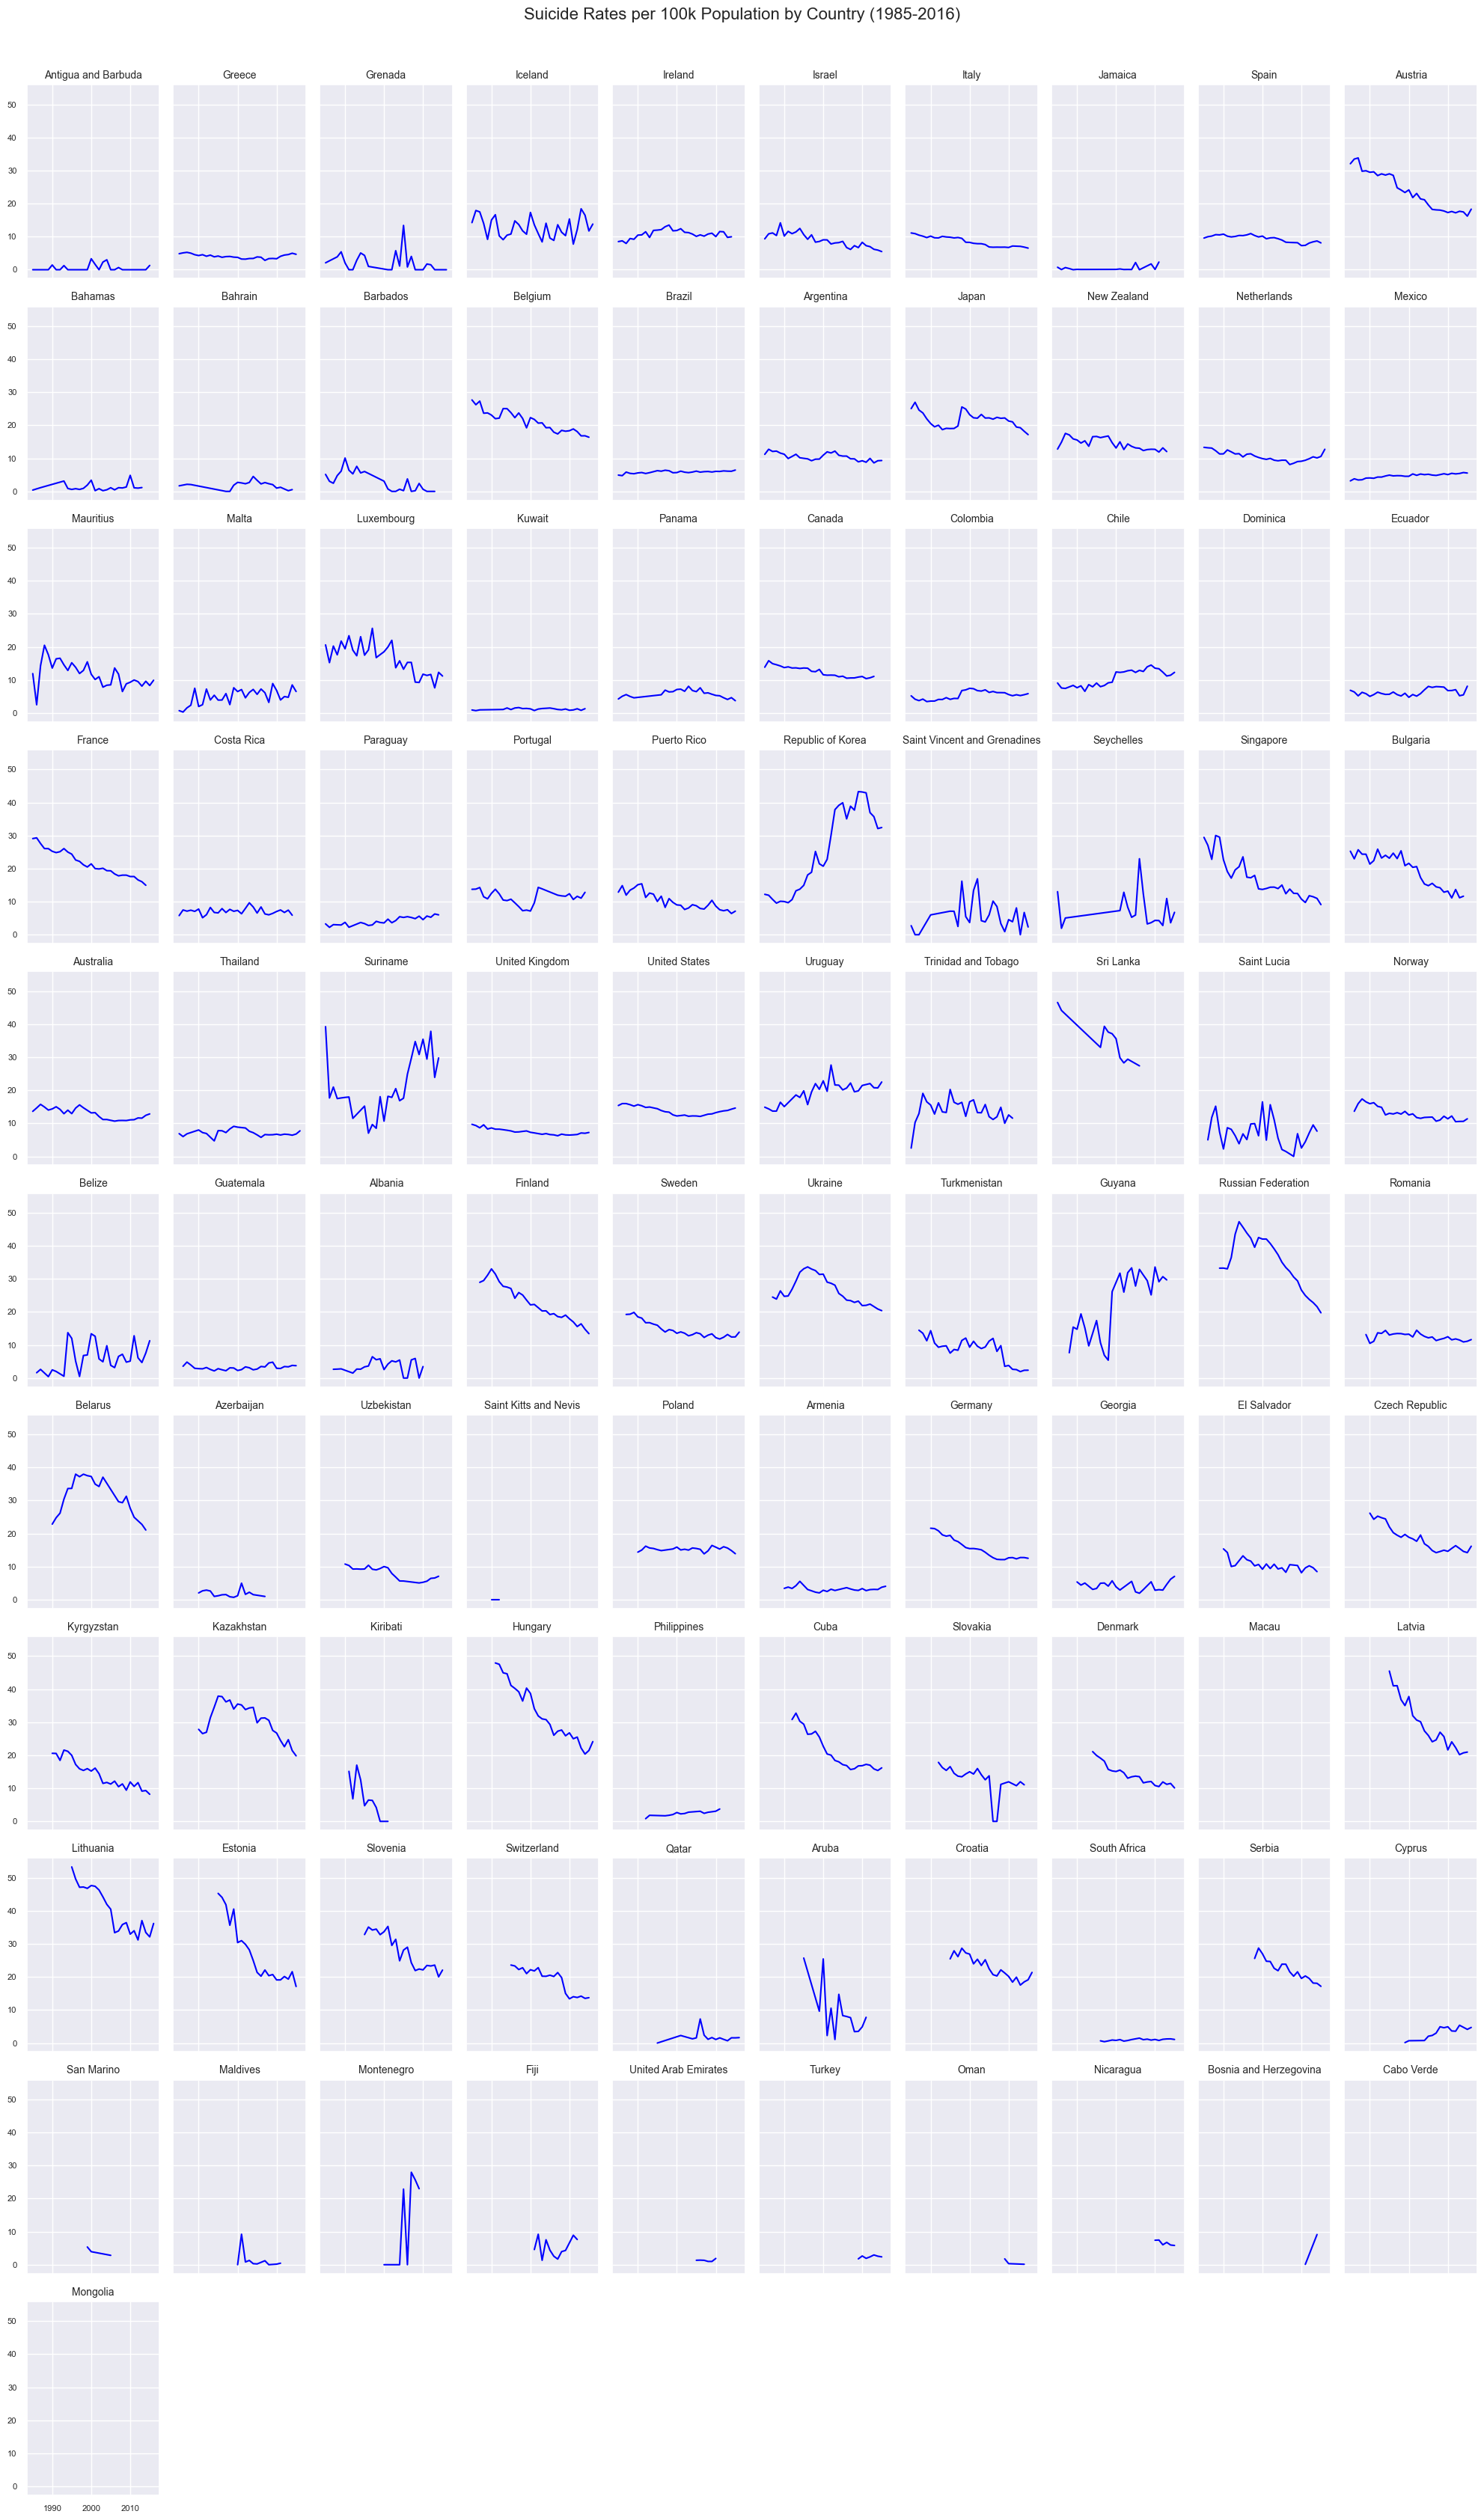

In [43]:
import matplotlib.pyplot as plt
import math

# Get the list of unique countries
countries = pivt["country"].unique()

# Calculate the grid size for subplots
num_countries = len(countries)
cols = 10  # Number of columns
rows = math.ceil(num_countries / cols)  # Number of rows

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each country's data in a subplot
for i, country in enumerate(countries):
    country_data = pivt[pivt["country"] == country]
    axes[i].plot(country_data["year"], country_data["suicides/100kpop"], label=country, color='blue')
    axes[i].set_title(country, fontsize=10)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.suptitle("Suicide Rates per 100k Population by Country (1985-2016)", fontsize=16, y=1.02)
plt.show()

### 7. **Trend by Sex Over Time:**

In [44]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [45]:
da_s_yr= data.groupby(by= ["sex", "year"])["suicides/100kpop"].mean().round(2).reset_index()
da_s_yr

sex  year  suicides/100kpop
0   female  1985              5.78
1   female  1986              5.81
2   female  1987              5.73
3   female  1988              6.32
4   female  1989              6.18
..     ...   ...               ...
59    male  2012             18.32
60    male  2013             17.85
61    male  2014             17.56
62    male  2015             17.53
63    male  2016             22.02

[64 rows x 3 columns]

<Axes: xlabel='year', ylabel='suicides/100kpop'>

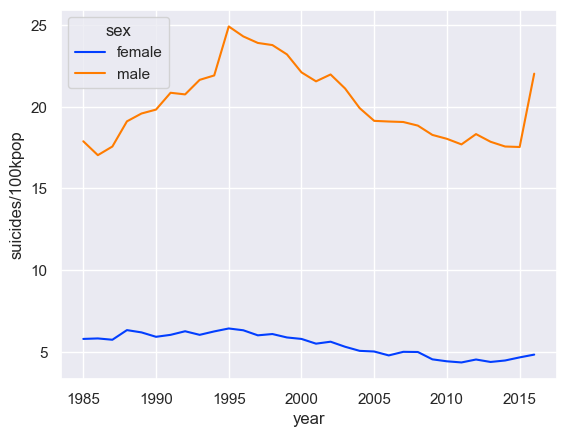

In [46]:
sns.lineplot(data= da_s_yr, x= "year", y= "suicides/100kpop", hue= "sex", palette= "bright")

The plot shows the trend of suicide rates (`suicides/100kpop`) for males and females over the years (1985–2016).

1. **Male Suicide Rates**:
   - The suicide rate for males is significantly higher than for females throughout the entire time period.

   - The rate peaks around the mid-1990s, reaching approximately 25 suicides per 100k population.

   - After the peak, there is a gradual decline in male suicide rates, with some fluctuations, until 2010. A slight increase is observed after 2015.

2. **Female Suicide Rates**:
   - The suicide rate for females remains consistently lower than that for males, staying below 5 suicides per 100k population.

   - There is a slight decline in female suicide rates over the years, with minimal fluctuations.

3. **Gender Disparity**:
   - The disparity between male and female suicide rates is evident, with male rates being approximately 4–5 times higher than female rates.

   - This suggests that males are at a significantly higher risk of suicide compared to females.

4. **Temporal Trends**:
   - Both male and female suicide rates show a general decline after the mid-1990s, which could indicate improvements in mental health awareness, interventions, or other societal changes.

   - The sharp increase in male suicide rates in the mid-1990s may be linked to specific global or regional events, such as economic crises or social changes.

- **Males** are more vulnerable to suicide, possibly due to societal pressures, stigma around seeking help, or other gender-specific factors.

- The decline in rates after the 1990s may reflect the impact of mental health initiatives or changes in reporting practices.

> Focus on targeted mental health interventions for males, addressing societal pressures and encouraging help-seeking behavior.
 
> Continue monitoring trends to identify and address emerging issues, especially for males.

### 8. **Age Group Trends Over Years**

In [47]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [48]:
# Using Average Values:
sore= data.groupby(by= ["year", "age"])["suicides/100kpop"].mean().round(2).reset_index()
sore.head(5)

year     age  suicides/100kpop
0  1985  15-24               8.43
1  1985  25-34              10.01
2  1985  35-54              12.40
3  1985   5-14               0.54
4  1985  55-74              15.09

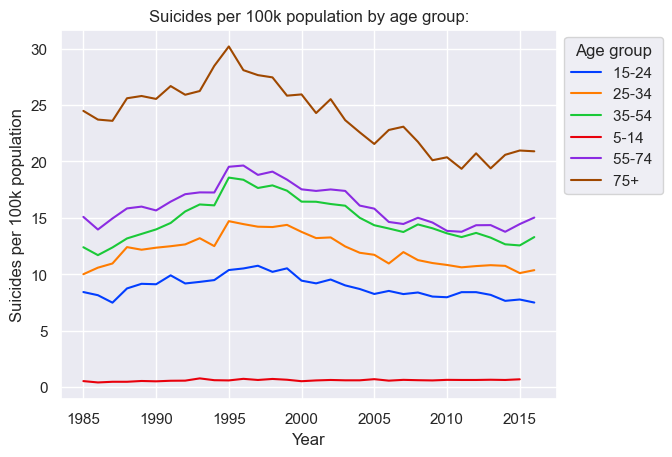

In [49]:
sns.lineplot(data= sore, x= "year", y= "suicides/100kpop", hue= "age", palette= "bright", legend= "full")
plt.title("Suicides per 100k population by age group:")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population") 
plt.legend(title= "Age group", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [50]:
# Using Sum:
sore= data.groupby(by= ["year", "age"])["suicides/100kpop"].sum().round(2).reset_index()
sore.head(5)

year     age  suicides/100kpop
0  1985  15-24             809.25
1  1985  25-34             960.84
2  1985  35-54            1190.69
3  1985   5-14              51.56
4  1985  55-74            1449.06

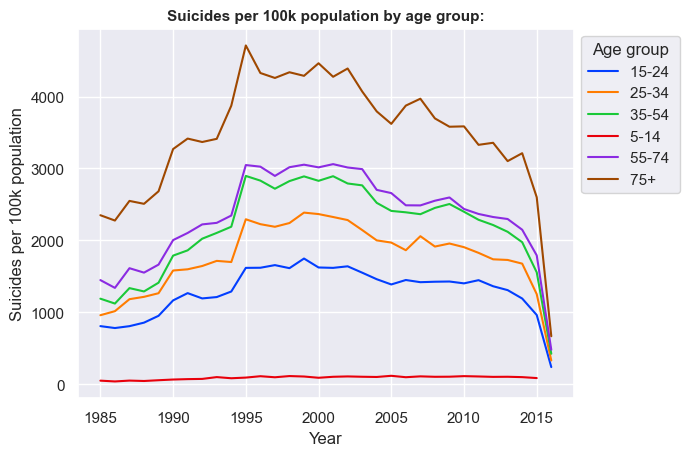

In [51]:
sns.lineplot(data= sore, x= "year", y= "suicides/100kpop", hue= "age", palette= "bright", legend= "full")
plt.title("Suicides per 100k population by age group:", fontsize= 11, fontweight= "bold")
plt.xlabel("Year")
plt.ylabel("Suicides per 100k population") 
plt.legend(title= "Age group", loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

### 9. **Suicides per Generation Over Time:**

In [52]:
data.head(4)

country  year     sex     age  suicides_no  population  suicides/100kpop  \
0  Albania  1987    male  15-24            21      312900              6.71   
1  Albania  1987    male  35-54            16      308000              5.19   
2  Albania  1987  female  15-24            14      289700              4.83   
3  Albania  1987    male    75+             1       21800              4.59   

   country-year  HDIforyear  gdp_for_year()  gdp_per_capita()  \
0  Albania-1987    0.828088      2156624900               796   
1  Albania-1987    0.828088      2156624900               796   
2  Albania-1987    0.828088      2156624900               796   
3  Albania-1987    0.828088      2156624900               796   

        generation continent  
0     Generation X    Europe  
1           Silent    Europe  
2     Generation X    Europe  
3  G.I. Generation    Europe

In [53]:
# Calculate the total suicides per generation per year:
dp_per= data.groupby(by= ["generation", "year"])["suicides_no"].sum()
dp_per= dp_per.reset_index()
dp_per

generation  year  suicides_no
0      Boomers  1985        20771
1      Boomers  1986        21685
2      Boomers  1987        22309
3      Boomers  1988        21332
4      Boomers  1989        29427
..         ...   ...          ...
141     Silent  2012        24578
142     Silent  2013        24153
143     Silent  2014        24865
144     Silent  2015        23114
145     Silent  2016         1857

[146 rows x 3 columns]

In [54]:
# To check if our grouping logic is doing fine:
data[(data['generation'] == "Boomers") & (data["year"]== 1985)]["suicides_no"].sum()

np.int64(20771)

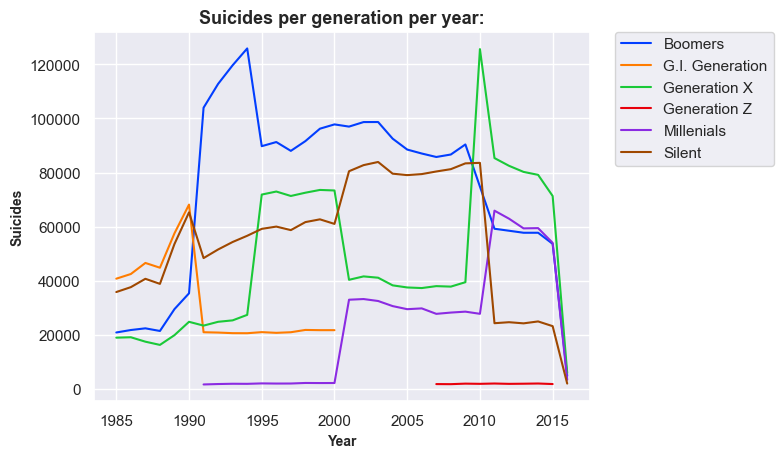

In [55]:
sns.lineplot(data= dp_per, x= "year", y= "suicides_no", hue= "generation", palette= "bright", legend= "full")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Suicides per generation per year:", fontsize= 13, fontweight= "bold")
plt.xlabel("Year", fontsize= 10, fontweight= "bold")
plt.ylabel("Suicides", fontsize= 10, fontweight= "bold")
plt.show()

In [56]:
# Calculate the total suicides per generation per year:
dp_per= data.groupby(by= ["generation", "year"])["suicides_no"].mean().round(2)
dp_per= dp_per.reset_index()
dp_per

generation  year  suicides_no
0      Boomers  1985       216.36
1      Boomers  1986       225.89
2      Boomers  1987       206.56
3      Boomers  1988       217.67
4      Boomers  1989       282.95
..         ...   ...          ...
141     Silent  2012       151.72
142     Silent  2013       150.96
143     Silent  2014       159.39
144     Silent  2015       186.40
145     Silent  2016        58.03

[146 rows x 3 columns]

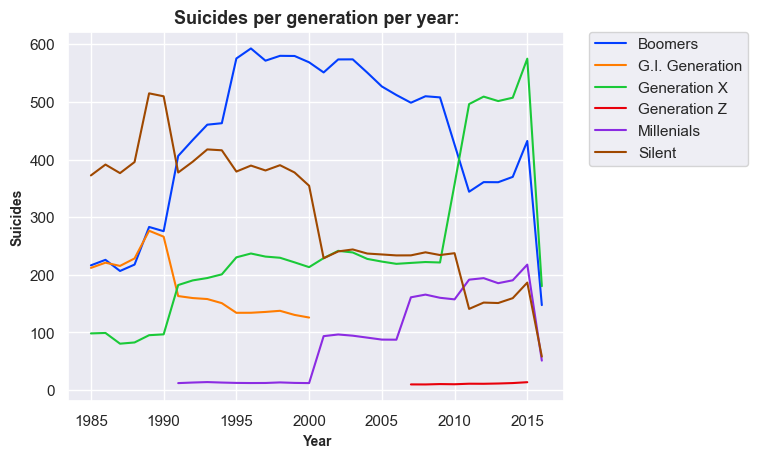

In [57]:
sns.lineplot(data= dp_per, x= "year", y= "suicides_no", hue= "generation", palette= "bright", legend= "full", markers='auto')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Suicides per generation per year:", fontsize= 13, fontweight= "bold")
plt.xlabel("Year", fontsize= 10, fontweight= "bold")
plt.ylabel("Suicides", fontsize= 10, fontweight= "bold")
plt.show()

> **`Note:`** If I use `sum()` then, it takes the total `suicides_no` per generation per year and, if I use `mean()` then it takes the average `suicides_no` per generation per year.

### 10. **Year-over-Year % Change in Suicides:** 

In [58]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [59]:
# To calculate year-to-year % change in total suiciides:
# Calculate the % change in total suicides for each year: 

In [60]:
# First group by year to get total suicides per year
yearly_suicides = data.groupby('year')['suicides_no'].sum().reset_index()

# Calculate the percentage change
yearly_suicides['pct_change'] = yearly_suicides['suicides_no'].pct_change() * 100

# Round to 2 decimal places
yearly_suicides['pct_change'] = yearly_suicides['pct_change'].round(2)

# To display the results
print("Year-to-Year Percentage Change in Total Suicides:")
print(yearly_suicides)

Year-to-Year Percentage Change in Total Suicides:
    year  suicides_no  pct_change
0   1985       116063         NaN
1   1986       120670        3.97
2   1987       126842        5.11
3   1988       121026       -4.59
4   1989       160244       32.40
5   1990       193361       20.67
6   1991       198020        2.41
7   1992       211473        6.79
8   1993       221565        4.77
9   1994       232063        4.74
10  1995       243544        4.95
11  1996       246725        1.31
12  1997       240745       -2.42
13  1998       249591        3.67
14  1999       256119        2.62
15  2000       255832       -0.11
16  2001       250652       -2.02
17  2002       256095        2.17
18  2003       256079       -0.01
19  2004       240861       -5.94
20  2005       234375       -2.69
21  2006       233361       -0.43
22  2007       233408        0.02
23  2008       235447        0.87
24  2009       243487        3.41
25  2010       238702       -1.97
26  2011       236484       -0.9

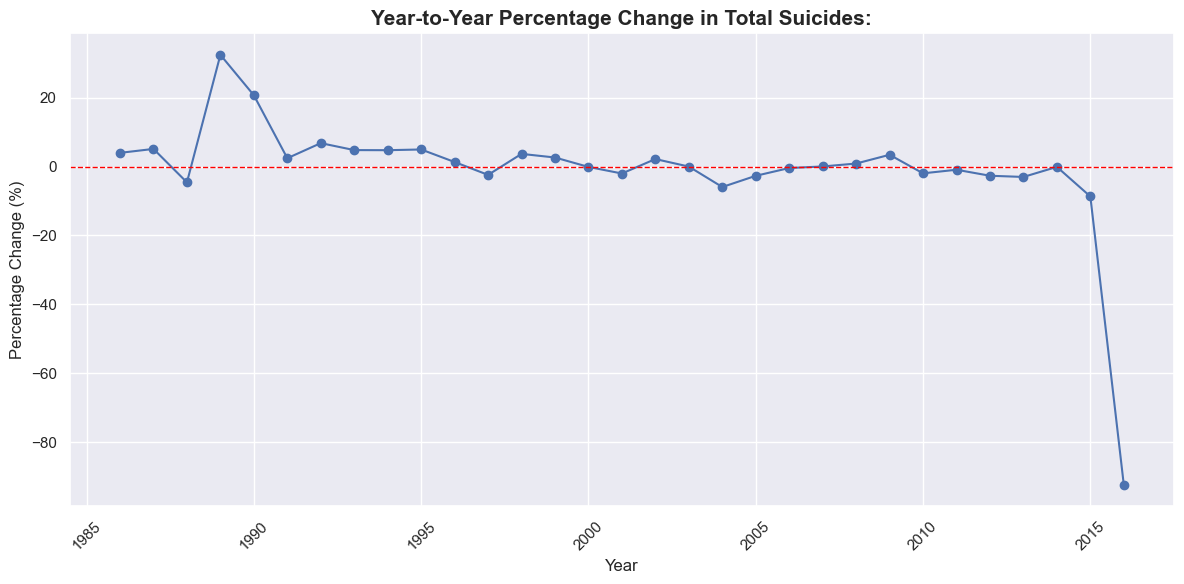

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_suicides['year'], yearly_suicides['pct_change'], marker='o')
plt.title('Year-to-Year Percentage Change in Total Suicides:', fontsize= 15, fontweight= "bold")
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

During 1987 to 1993, there is sudden increase in Suicides where there is huge decline in rates after 2014.

-----
---
---

## **C. DEMOGRAPHIC ANALYSIS:**

### 11. **Male vs Female Suicide Counts by Age:**

In [62]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [63]:
# Group by sex and year and compare counts:
grouped_data= data.groupby(by= ['sex', 'age'])["suicides_no"].sum().reset_index()#.pivot(index='sex', columns='age')

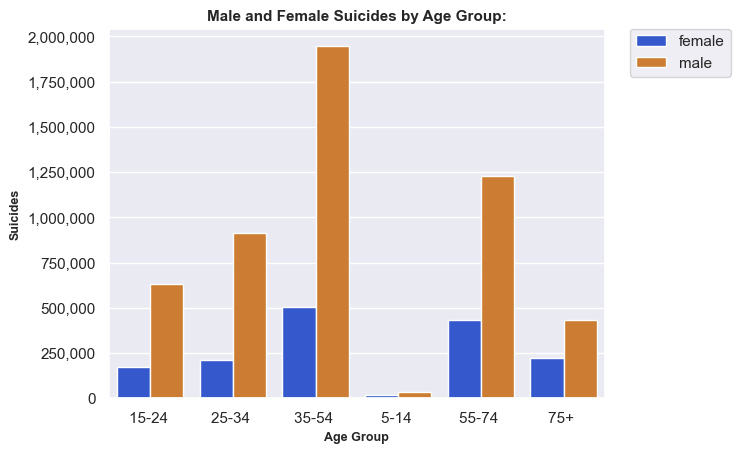

In [64]:
sns.barplot(data= grouped_data, x= "age", y= "suicides_no", hue= "sex", palette= "bright", legend= True, saturation= 0.6)
plt.title("Male and Female Suicides by Age Group:", fontsize= 11, fontweight= "bold")
plt.xlabel("Age Group", fontsize= 9, fontweight= "bold")
plt.ylabel("Suicides", fontsize= 9, fontweight= "bold")
# PLot legebd outside the plot:
plt.legend(bbox_to_anchor= (1.05, 1), loc= "upper left", borderaxespad= 0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

So, I find that males are highly vulnerable to suicides and males from 35-54 age group are extremely vulnerable to suicides, the numbers are very high for this age group suggesting some immediate intervensions for males in 35-54.

In [65]:
# Group by sex and year and compare counts:
grouped_data= data.groupby(by= ['sex', 'age'])["suicides/100kpop"].mean().reset_index()#.pivot(index='sex', columns='age')
grouped_data

sex     age  suicides/100kpop
0   female  15-24           4.328018
1   female  25-34           4.573210
2   female  35-54           5.916480
3   female   5-14           0.462252
4   female  55-74           7.123447
5   female    75+           9.919802
6     male  15-24          13.566290
7     male  25-34          19.800560
8     male  35-54          23.978402
9     male   5-14           0.777831
10    male  55-74          25.187712
11    male    75+          37.991017

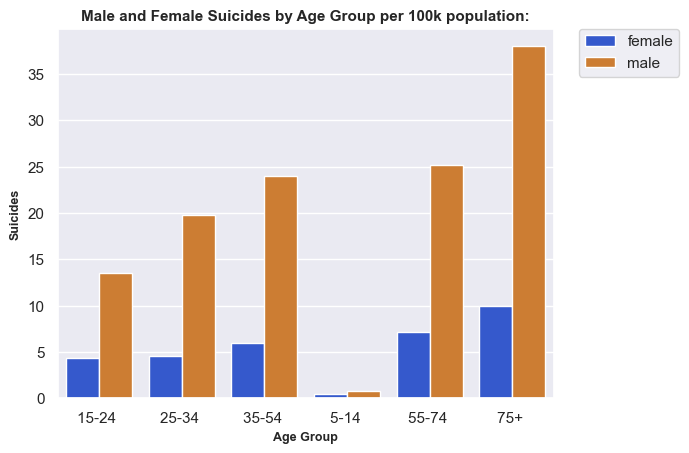

In [66]:
sns.barplot(data= grouped_data, x= "age", y= "suicides/100kpop", hue= "sex", palette= "bright", legend= True, saturation= 0.6)
plt.title("Male and Female Suicides by Age Group per 100k population:", fontsize= 11, fontweight= "bold")
plt.xlabel("Age Group", fontsize= 9, fontweight= "bold")
plt.ylabel("Suicides", fontsize= 9, fontweight= "bold")
# PLot legebd outside the plot:
plt.legend(bbox_to_anchor= (1.05, 1), loc= "upper left", borderaxespad= 0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()

If we take population into consideration, then males in age group 75+ are more vulnerable to suicides as about 50 suicides per 100k males in this age group committe suicide.

### 12. **Population vs Suicide Rate Correlation:**

In [67]:
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')


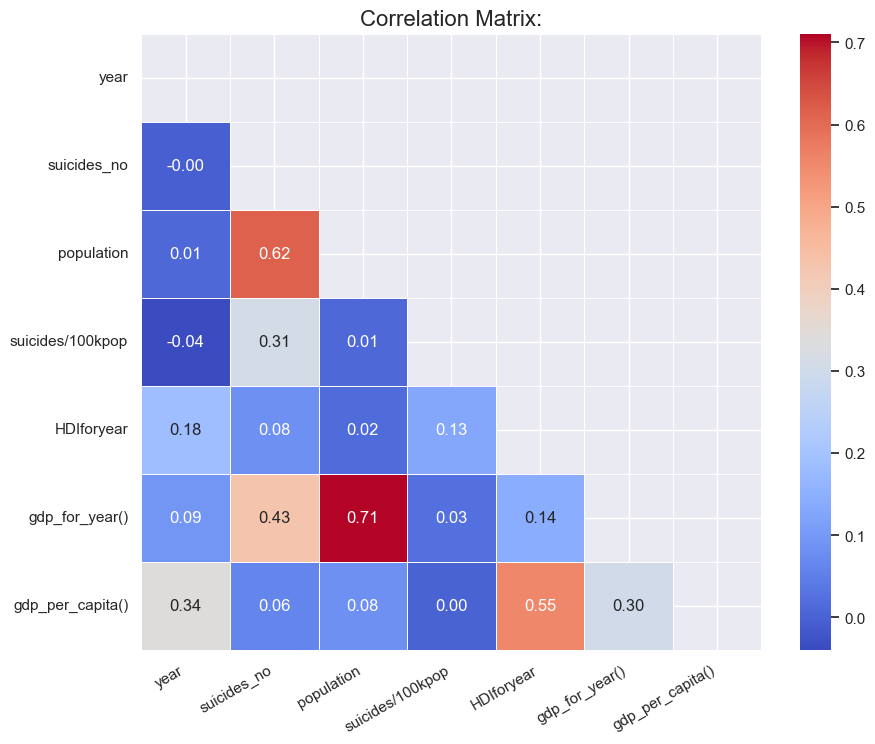

In [68]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask for the upper triangle:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm' , fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix:', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.show()

- There is a strong positive correlation between the total number of suicides (`suicides_no`) and the population size. This suggests that larger populations tend to have higher absolute numbers of suicides, which is expected.

- A strong positive correlation exists between GDP for the year and population. This indicates that countries with larger populations tend to have higher total GDP.

- A moderate positive correlation exists between GDP per capita and total GDP. This suggests that wealthier countries (in terms of GDP per capita) also tend to have higher total GDP.

- A weak positive correlation exists between the suicide rate per 100k population and the total number of suicides. This indicates that higher suicide rates are somewhat associated with higher absolute numbers of suicides.

- Larger populations are associated with higher total suicides and GDP, but the suicide rate per 100k population is not strongly influenced by population size.

- Wealthier countries (higher GDP per capita) tend to have better HDI scores, but the correlation is not very strong.

- The weak correlation between `suicides/100kpop` and other variables suggests that suicide rates are influenced by factors beyond population size or GDP.

### 13. **HDI vs Suicide Rate:**

- If the `correlation is negative and significant`, it suggests that `higher human development (HDI) is associated with lower suicide rates`.

- If the `correlation is weak or positive`, it indicates that `HDI may not have a strong inverse effect on suicide rates`, and other factors might be influencing the rates.

In [69]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

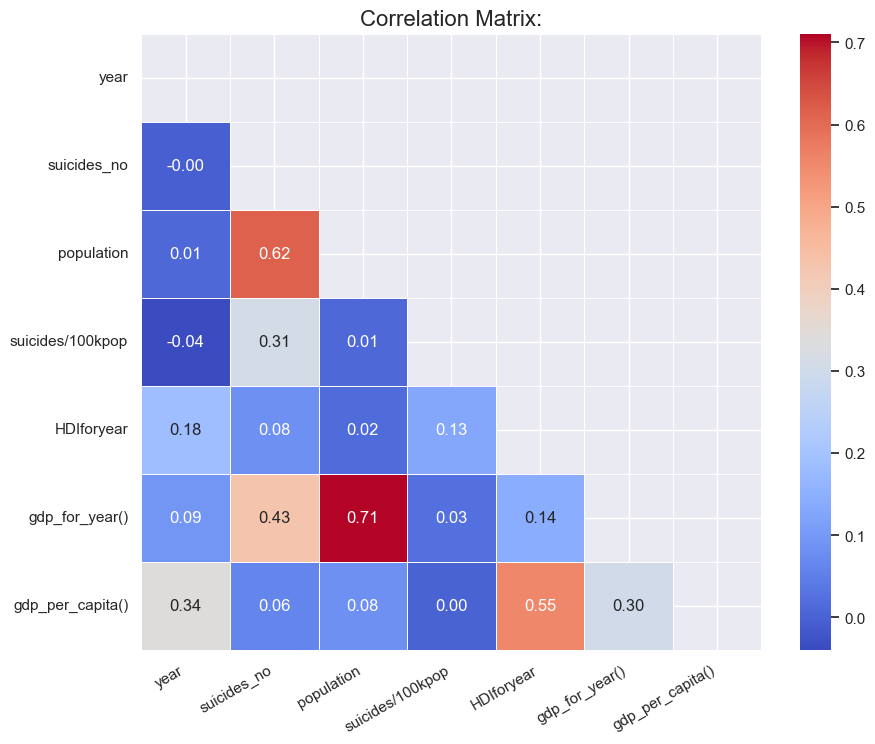

In [70]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask for the upper triangle:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm' , fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix:', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.show()

In [71]:
yhds= data[["HDIforyear", "suicides/100kpop"]]
# calculate correlatio between HDIforyear and suicides/100kpop
yhds.corr()

HDIforyear  suicides/100kpop
HDIforyear          1.000000          0.129258
suicides/100kpop    0.129258          1.000000

From this, we see that the `correlation is weak positive`, indicating `HDI may not have a strong inverse effect on suicide rates`, and other factors might be influencing the rates.

This can be seen with a scatter plot with best-fit line:

Correlation between HDI for year and suicides/100kpop: 0.13


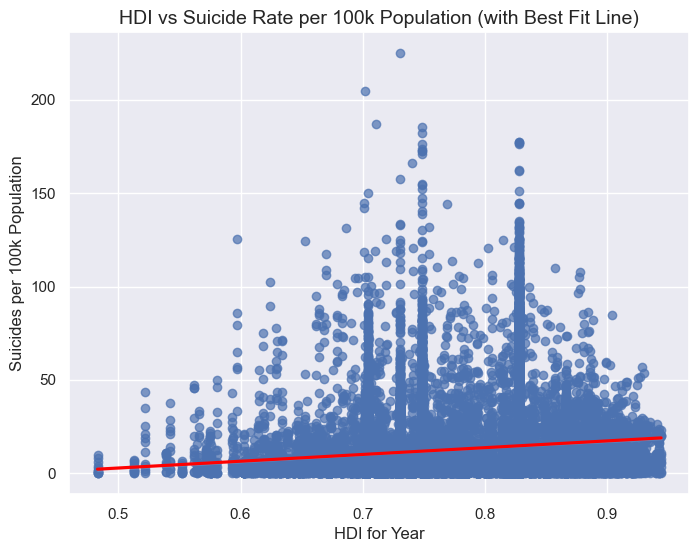

In [72]:
hdi_suicide_data = data[['HDIforyear', 'suicides/100kpop']].dropna()

# Calculate the correlation
correlation = hdi_suicide_data.corr().iloc[0, 1]
print(f"Correlation between HDI for year and suicides/100kpop: {correlation:.2f}")

# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=hdi_suicide_data, x='HDIforyear', y='suicides/100kpop', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('HDI vs Suicide Rate per 100k Population (with Best Fit Line)', fontsize=14)
plt.xlabel('HDI for Year')
plt.ylabel('Suicides per 100k Population')
plt.grid(True)
plt.show()

### 14. **GDP per Capita vs Suicide Rate:**

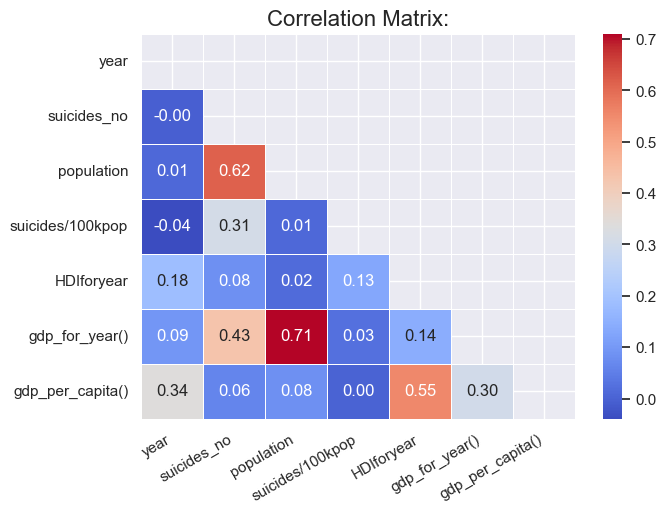

In [73]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a mask for the upper triangle:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm' , fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix:', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.show()

From correlation metrix, I do not find any significant relation between `gdp_per_capita()` and `suicides/100kpop`; infact there is perfectly no correlation between them indicating there are some other factors influencing suicides.

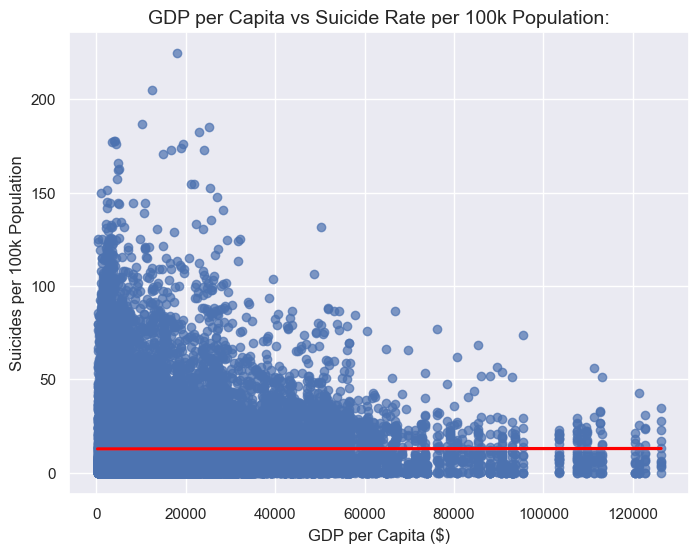

In [74]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(data=data, x='gdp_per_capita()', y='suicides/100kpop', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('GDP per Capita vs Suicide Rate per 100k Population:', fontsize=14)
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.grid(True)
plt.show()

Even though, best fit line is flat, scatterplot indicates there is a pattern that indicates as the GDP per Capita increases, the suicides/100kpop decreases indicating wealth do have influence in suicides rate.

### 15. **Sex-wise Suicide Rate within Generations:**

In [75]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [76]:
data.head(3)

country  year     sex     age  suicides_no  population  suicides/100kpop  \
0  Albania  1987    male  15-24            21      312900              6.71   
1  Albania  1987    male  35-54            16      308000              5.19   
2  Albania  1987  female  15-24            14      289700              4.83   

   country-year  HDIforyear  gdp_for_year()  gdp_per_capita()    generation  \
0  Albania-1987    0.828088      2156624900               796  Generation X   
1  Albania-1987    0.828088      2156624900               796        Silent   
2  Albania-1987    0.828088      2156624900               796  Generation X   

  continent  
0    Europe  
1    Europe  
2    Europe

In [77]:
datta= data.groupby(by= ["generation", "sex"])["suicides/100kpop"].mean().round(2).reset_index()
datta

generation     sex  suicides/100kpop
0           Boomers  female              5.82
1           Boomers    male             23.67
2   G.I. Generation  female             10.98
3   G.I. Generation    male             36.91
4      Generation X  female              4.26
5      Generation X    male             16.86
6      Generation Z  female              0.53
7      Generation Z    male              0.75
8        Millenials  female              2.52
9        Millenials    male              8.24
10           Silent  female              7.55
11           Silent    male             29.29

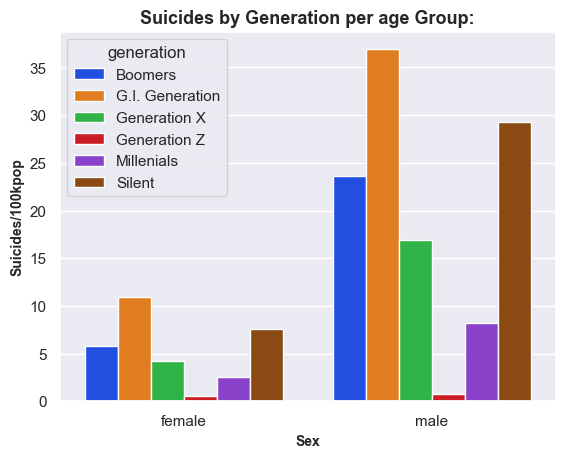

In [78]:
import matplotlib.pyplot as plt
sns.barplot(data= datta, x= "sex", y= "suicides/100kpop", hue= "generation", palette= "bright", )
plt.title("Suicides by Generation per age Group:", fontsize= 13,  fontweight= "bold")
plt.xlabel("Sex", fontsize= 10, fontweight= "bold")
plt.ylabel("Suicides/100kpop", fontsize= 10, fontweight= "bold")
plt.show()

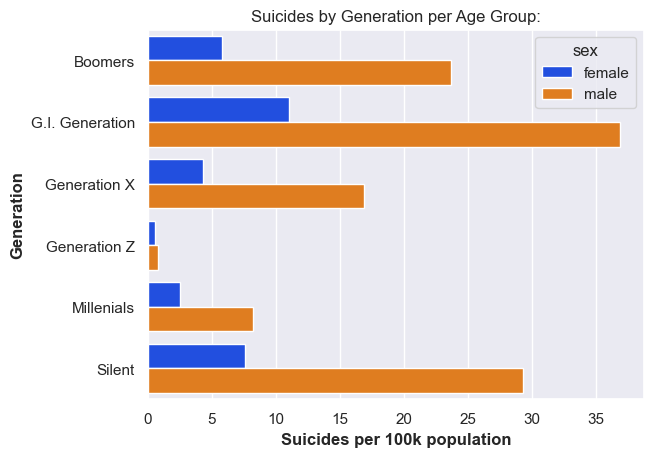

In [79]:
import matplotlib.pyplot as plt
sns.barplot(data= datta, hue= "sex", x= "suicides/100kpop", y= "generation", palette= "bright", )
plt.title("Suicides by Generation per Age Group:")
plt.xlabel("Suicides per 100k population",  fontsize= 12, fontweight= "bold")
plt.ylabel("Generation", fontsize= 12, fontweight= "bold")
plt.show()

- `Males` have significantly higher suicide rates across all generations compared to females. 

- The `Silent Generation` and `G.I. Generation` males exhibit the highest suicide rates, exceeding 30 suicides per 100k population. 

- Females across all generations have much lower rates, with minimal variation. 

This highlights a `strong gender disparity` in suicide rates, particularly among older generations.

----

## **D. GEOGRAPHICAL ANALYSIS:**

### 16. **Global Suicide Distribution Map:**

In [80]:
data.columns 

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [81]:
import plotly.express as px

# Aggregate suicide rates by country:
country_suicide_data = data.groupby('country')['suicides/100kpop'].mean().reset_index()

# Create a choropleth map:
fig = px.choropleth(
    country_suicide_data,
    locations="country",
    locationmode="country names",
    color="suicides/100kpop",
    hover_name="country",
    color_continuous_scale="Reds",
    title="Global Suicide Rates per 100k Population (1985-2016):"
)

# Update layout for better visualization
fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    coloraxis_colorbar=dict(title="Suicides/100k Pop:")
)

# Show the map
fig.show()

### 17. **Continent-Level Aggregation:**

In [82]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [83]:
# Aggregate suicide rates by continent:
continent_data = data.groupby('continent')['suicides/100kpop'].mean().reset_index()
continent_data

continent  suicides/100kpop
0         Africa          7.583071
1           Asia         11.188267
2         Europe         17.261354
3  North America          7.359460
4        Oceania         11.561831
5  South America         11.428745

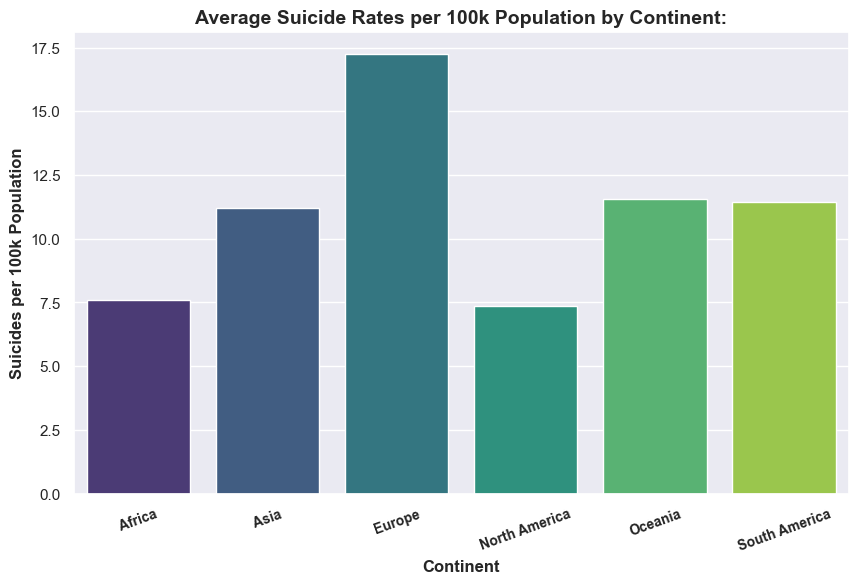

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(data=continent_data, x='continent', y='suicides/100kpop', palette='viridis', hue= "continent", legend= False)
plt.title('Average Suicide Rates per 100k Population by Continent:', fontsize=14, fontweight='bold')
plt.xlabel('Continent', fontsize=12, fontweight='bold')
plt.ylabel('Suicides per 100k Population', fontsize=12, fontweight='bold')
plt.xticks(rotation=20, fontsize=10, fontweight='bold')
plt.show()

`Europe` has the `highest suicide rate` (~17.5 per 100k), likely due to cultural, economic, or reporting factors.
`Africa` has the `lowest rate` (~7.5 per 100k), possibly due to underreporting or cultural stigma.

`Asia` and `Oceania` show moderate rates, while `North America` and `South America` are slightly lower.

### 18. **High-Income vs Low-Income Countries:**

In [85]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent'],
      dtype='object')

In [86]:
data["gdp_per_capita()"].describe()

count     27820.000000
mean      16866.464414
std       18887.576472
min         251.000000
25%        3447.000000
50%        9372.000000
75%       24874.000000
max      126352.000000
Name: gdp_per_capita(), dtype: float64

First I will create a new column `income_group` based on the `gdp_per_capita()` of each country and categorize each country according to World Bank Income Groups Thresold:

In [87]:
# Define thresholds for World Bank income groups based on GDP per capita:
def categorize_income(gdp_per_capita):
    if gdp_per_capita < 1045:  # Low-income threshold
        return "Low"
    elif 1045 <= gdp_per_capita < 4095:  # Lower-middle-income threshold
        return "Lower-Middle"
    elif 4095 <= gdp_per_capita < 12695:  # Upper-middle-income threshold
        return "Upper-Middle"
    else:  # High-income threshold
        return "High"

# Apply the function to create a new column:
data['income_group'] = data['gdp_per_capita()'].apply(categorize_income)
data.head()

country  year     sex     age  suicides_no  population  suicides/100kpop  \
0  Albania  1987    male  15-24            21      312900              6.71   
1  Albania  1987    male  35-54            16      308000              5.19   
2  Albania  1987  female  15-24            14      289700              4.83   
3  Albania  1987    male    75+             1       21800              4.59   
4  Albania  1987    male  25-34             9      274300              3.28   

   country-year  HDIforyear  gdp_for_year()  gdp_per_capita()  \
0  Albania-1987    0.828088      2156624900               796   
1  Albania-1987    0.828088      2156624900               796   
2  Albania-1987    0.828088      2156624900               796   
3  Albania-1987    0.828088      2156624900               796   
4  Albania-1987    0.828088      2156624900               796   

        generation continent income_group  
0     Generation X    Europe          Low  
1           Silent    Europe          Low  
2     Generation X    Europe          Low  
3  G.I. Generation    Europe          Low  
4          Boomers    Europe          Low

In [88]:
# Aggregate suicide rates by income groups:
income_data = data.groupby('income_group')['suicides/100kpop'].mean().reset_index().round(2)
income_data

income_group  suicides/100kpop
0          High             13.39
1           Low             11.05
2  Lower-Middle             13.13
3  Upper-Middle             12.05

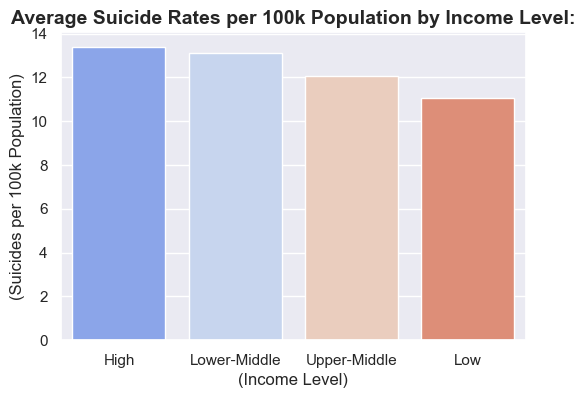

In [89]:
# Visualize the results:
plt.figure(figsize=(6, 4))
sns.barplot(data=income_data.sort_values(by= 'suicides/100kpop', ascending=False), x='income_group', y='suicides/100kpop', palette='coolwarm', hue= "income_group", legend= False)
plt.title('Average Suicide Rates per 100k Population by Income Level:', fontsize=14, fontweight='bold')
plt.xlabel('(Income Level)', fontsize=12)
plt.ylabel('(Suicides per 100k Population)', fontsize=12)
plt.xticks(rotation=0)
plt.show()

`High-income` countries have the `highest suicide rates`, followed by lower-middle and upper-middle-income groups, while `low-income countries have the lowest rates`. 

This may indicate better reporting in wealthier nations or societal pressures, while underreporting or cultural stigma could affect low-income countries.

### 19. **Post-Soviet States Suicide Patterns:**

In [90]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent', 'income_group'],
      dtype='object')

In [91]:
# Create a list of countries that were part of the former USSR:
post_soviet_states = [
    "Armenia", "Azerbaijan", "Belarus", "Estonia", "Georgia", "Kazakhstan",
    "Kyrgyzstan", "Latvia", "Lithuania", "Moldova", "Russia", "Tajikistan",
    "Turkmenistan", "Ukraine", "Uzbekistan"
]

# Filter data for Post-Soviet States:
post_soviet_data = data[data['country'].isin(post_soviet_states)]
post_soviet_data

country  year     sex     age  suicides_no  population  \
960       Armenia  1990    male  35-54            25      332700   
961       Armenia  1990    male    75+             2       26900   
962       Armenia  1990    male  55-74            11      183800   
963       Armenia  1990    male  25-34            16      307100   
964       Armenia  1990  female  35-54            15      358000   
...           ...   ...     ...     ...          ...         ...   
27815  Uzbekistan  2014  female  35-54           107     3620833   
27816  Uzbekistan  2014  female    75+             9      348465   
27817  Uzbekistan  2014    male   5-14            60     2762158   
27818  Uzbekistan  2014  female   5-14            44     2631600   
27819  Uzbekistan  2014  female  55-74            21     1438935   

       suicides/100kpop     country-year  HDIforyear  gdp_for_year()  \
960                7.51     Armenia-1990       0.632      2256838858   
961                7.43     Armenia-1990       0.632      2256838858   
962                5.98     Armenia-1990       0.632      2256838858   
963                5.21     Armenia-1990       0.632      2256838858   
964                4.19     Armenia-1990       0.632      2256838858   
...                 ...              ...         ...             ...   
27815              2.96  Uzbekistan-2014       0.675     63067077179   
27816              2.58  Uzbekistan-2014       0.675     63067077179   
27817              2.17  Uzbekistan-2014       0.675     63067077179   
27818              1.67  Uzbekistan-2014       0.675     63067077179   
27819              1.46  Uzbekistan-2014       0.675     63067077179   

       gdp_per_capita()       generation continent  income_group  
960                 756           Silent      Asia           Low  
961                 756  G.I. Generation      Asia           Low  
962                 756  G.I. Generation      Asia           Low  
963                 756          Boomers      Asia           Low  
964                 756           Silent      Asia           Low  
...                 ...              ...       ...           ...  
27815              2309     Generation X      Asia  Lower-Middle  
27816              2309           Silent      Asia  Lower-Middle  
27817              2309     Generation Z      Asia  Lower-Middle  
27818              2309     Generation Z      Asia  Lower-Middle  
27819              2309          Boomers      Asia  Lower-Middle  

[3344 rows x 14 columns]

In [92]:
# Group the data by year and country to analyze trends in suicide 
# rates (`suicides/100kpop`) over time:
post_soviet_trends = post_soviet_data.groupby(['year', 'country'])['suicides/100kpop'].mean().reset_index()
post_soviet_trends

year       country  suicides/100kpop
0    1987  Turkmenistan         14.467500
1    1987       Ukraine         24.503333
2    1988  Turkmenistan         13.537500
3    1988       Ukraine         23.893333
4    1989  Turkmenistan         11.277500
..    ...           ...               ...
274  2015     Lithuania         32.123333
275  2015  Turkmenistan          2.373333
276  2015       Ukraine         20.393333
277  2016       Armenia          4.056000
278  2016     Lithuania         36.172000

[279 rows x 3 columns]

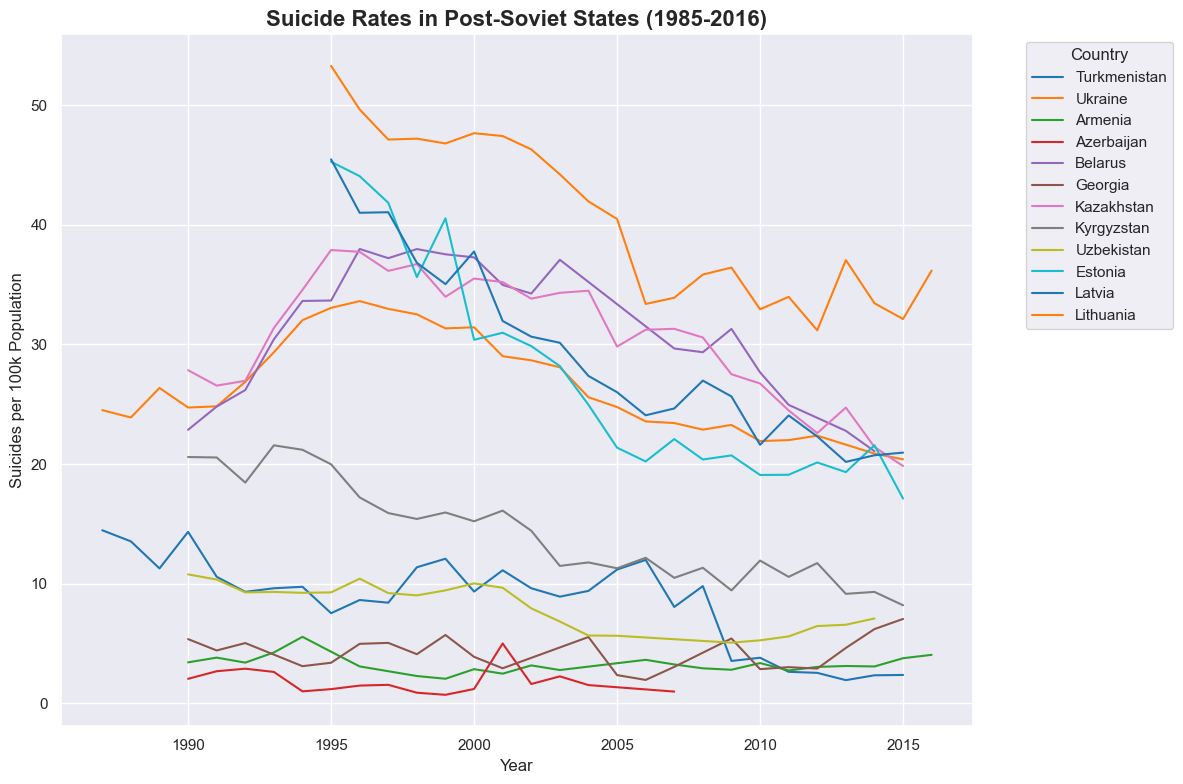

In [93]:
# Plot trends for each country:
plt.figure(figsize=(12, 8))
sns.lineplot(data=post_soviet_trends, x='year', y='suicides/100kpop', hue='country', palette='tab10')
plt.title('Suicide Rates in Post-Soviet States (1985-2016)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicides per 100k Population', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

- **`Sharp Increase Post-1991`**: Many countries (e.g., Lithuania, Latvia, Belarus) show a sharp rise in suicide rates after the USSR's dissolution in 1991, likely due to economic instability, social upheaval, and transition challenges.

- **`Peak and Decline`**: Suicide rates peaked in the mid-1990s for most countries (e.g., Lithuania, Kazakhstan) and then gradually declined, possibly due to stabilization and improved mental health awareness.

- **`Country Variations`**: 
   - **`Lithuania`** consistently has the highest rates, exceeding 50 per 100k at its peak.
   - **`Turkmenistan`** and **`Azerbaijan`** have relatively low and stable rates.

- **`Recent Trends`**: Post-2010, most countries show a decline, though some (e.g., Ukraine) exhibit fluctuations, possibly due to ongoing conflicts or crises.

Now check the average rate of suicides per 100k population per year for `Russian Fedration`:

In [94]:
# Select all available data for Russian Fedration:

russ= data[data["country"]== "Russian Federation"]

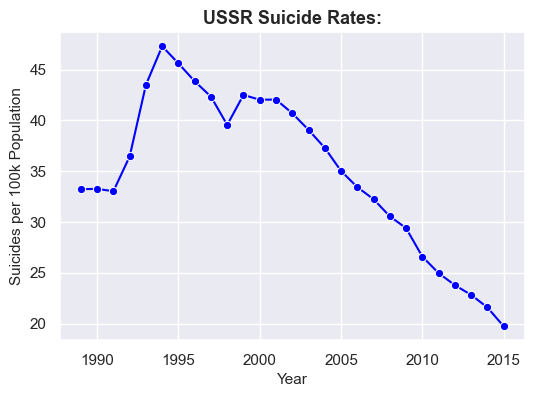

In [95]:
# Group by year and calculate the average suicide rate:
ussr_trends_pre_1991 = russ.groupby('year')['suicides/100kpop'].mean().reset_index()

# Plot the trend:
plt.figure(figsize=(6,4))
sns.lineplot(data=ussr_trends_pre_1991, x='year', y='suicides/100kpop', marker='o', color='blue')
plt.title('USSR Suicide Rates:', fontsize=13, fontweight='bold')
plt.xlabel('Year', fontsize=11)
plt.ylabel('Suicides per 100k Population', fontsize=11)
plt.grid(True)
plt.show()

- **`Sharp Increase (1990–1995)`**: Suicide rates rose significantly after the USSR's dissolution, peaking around 1995, likely due to economic instability and social upheaval.

- **`Gradual Decline (1995–2015)`**: Rates steadily decreased after 2000, possibly due to stabilization, improved mental health awareness, and interventions.

- **`Overall Trend`**: A clear peak in the mid-1990s followed by a consistent decline highlights the long-term impact of socio-economic transitions.

### 20. **War-affected vs Peaceful Countries:**

1. **`Define War-Affected Countries`**:   

    I create a list of countries with recent conflicts (e.g., Syria, Afghanistan, Iraq, etc.).

In [96]:
# Define war-affected countries: 
war_affected_countries = ["Syria", "Afghanistan","Pakistan" "Iraq", "Ukraine", "Yemen", "Isryal"]

2. **`Filter Data`**:   

    Separate the dataset into two groups: `war-affected` and `peaceful countries`.

In [97]:
# Add a column to classify countries as war-affected or peaceful
data['conflict_status'] = data['country'].apply(lambda x: 'War-Affected' if x in war_affected_countries else 'Peaceful')

In [98]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent', 'income_group',
       'conflict_status'],
      dtype='object')

3. **`Calculate Suicide Rates`**:  

    Compute the average suicide rate (`suicides/100kpop`) for each group.

In [99]:
# Group by conflict status and calculate average suicide rates
conflict_data = data.groupby('conflict_status')['suicides/100kpop'].mean().reset_index()

4. **`Visualize`**:   

    I plot a BarPlot to visualize the rate of suicide per 100k population.

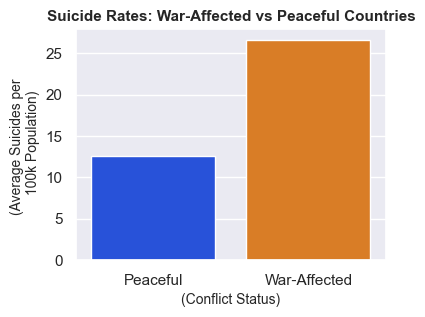

In [100]:
plt.figure(figsize=(4, 3))
sns.barplot(data=conflict_data, x='conflict_status', y='suicides/100kpop', palette='bright', hue= "conflict_status", legend= False, saturation=0.7)
plt.title('Suicide Rates: War-Affected vs Peaceful Countries', fontsize=11, fontweight='bold')
plt.xlabel('(Conflict Status)', fontsize=10)
plt.ylabel('(Average Suicides per \n 100k Population)', fontsize=10) # \n for next line
plt.show()

**Higher Suicide Rates in War-Affected Countries**: War-affected countries show significantly higher rates, it indicates the psychological toll of conflict, displacement, and trauma.

**Lower Rates in Peaceful Countries**: Peaceful countries obviously have better mental health resources and stability comapred to War-Affected Countries, leading to lower suicide rates.

----
----
---

## **E. COMPARATIVE ANALYSIS:**

### 21. **Country-Year Suicide Rate Comparison:**

In [101]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent', 'income_group',
       'conflict_status'],
      dtype='object')

In [102]:
data.head(3)

country  year     sex     age  suicides_no  population  suicides/100kpop  \
0  Albania  1987    male  15-24            21      312900              6.71   
1  Albania  1987    male  35-54            16      308000              5.19   
2  Albania  1987  female  15-24            14      289700              4.83   

   country-year  HDIforyear  gdp_for_year()  gdp_per_capita()    generation  \
0  Albania-1987    0.828088      2156624900               796  Generation X   
1  Albania-1987    0.828088      2156624900               796        Silent   
2  Albania-1987    0.828088      2156624900               796  Generation X   

  continent income_group conflict_status  
0    Europe          Low        Peaceful  
1    Europe          Low        Peaceful  
2    Europe          Low        Peaceful

1. First I choose a specific year say 2010, to analyze suicide rates across countries. Then, filter the dataset for 2010.

In [103]:
# Filter data for a specific year
selected_year = 2010
year_data = data[data['year'] == selected_year]

2. Now, group the data by `country` and calculate the average suicide rate (`suicides/100kpop`) for each country in the year 2010.

In [104]:
# Group by country and calculate average suicide rates
country_year_data = year_data.groupby('country')['suicides/100kpop'].mean().reset_index()

3. Sort the countries by their suicide rates to identify the highest and lowest rates.

In [105]:
# Sort data by suicide rates:
country_year_data = country_year_data.sort_values(by='suicides/100kpop', ascending=False)
country_year_data.head()

country  suicides/100kpop
63  Republic of Korea         43.183333
75           Suriname         35.441667
33             Guyana         33.589167
45          Lithuania         32.936667
9             Belarus         27.665000

4. I use a bar plot to display the suicide rates for all countries in year 2010.

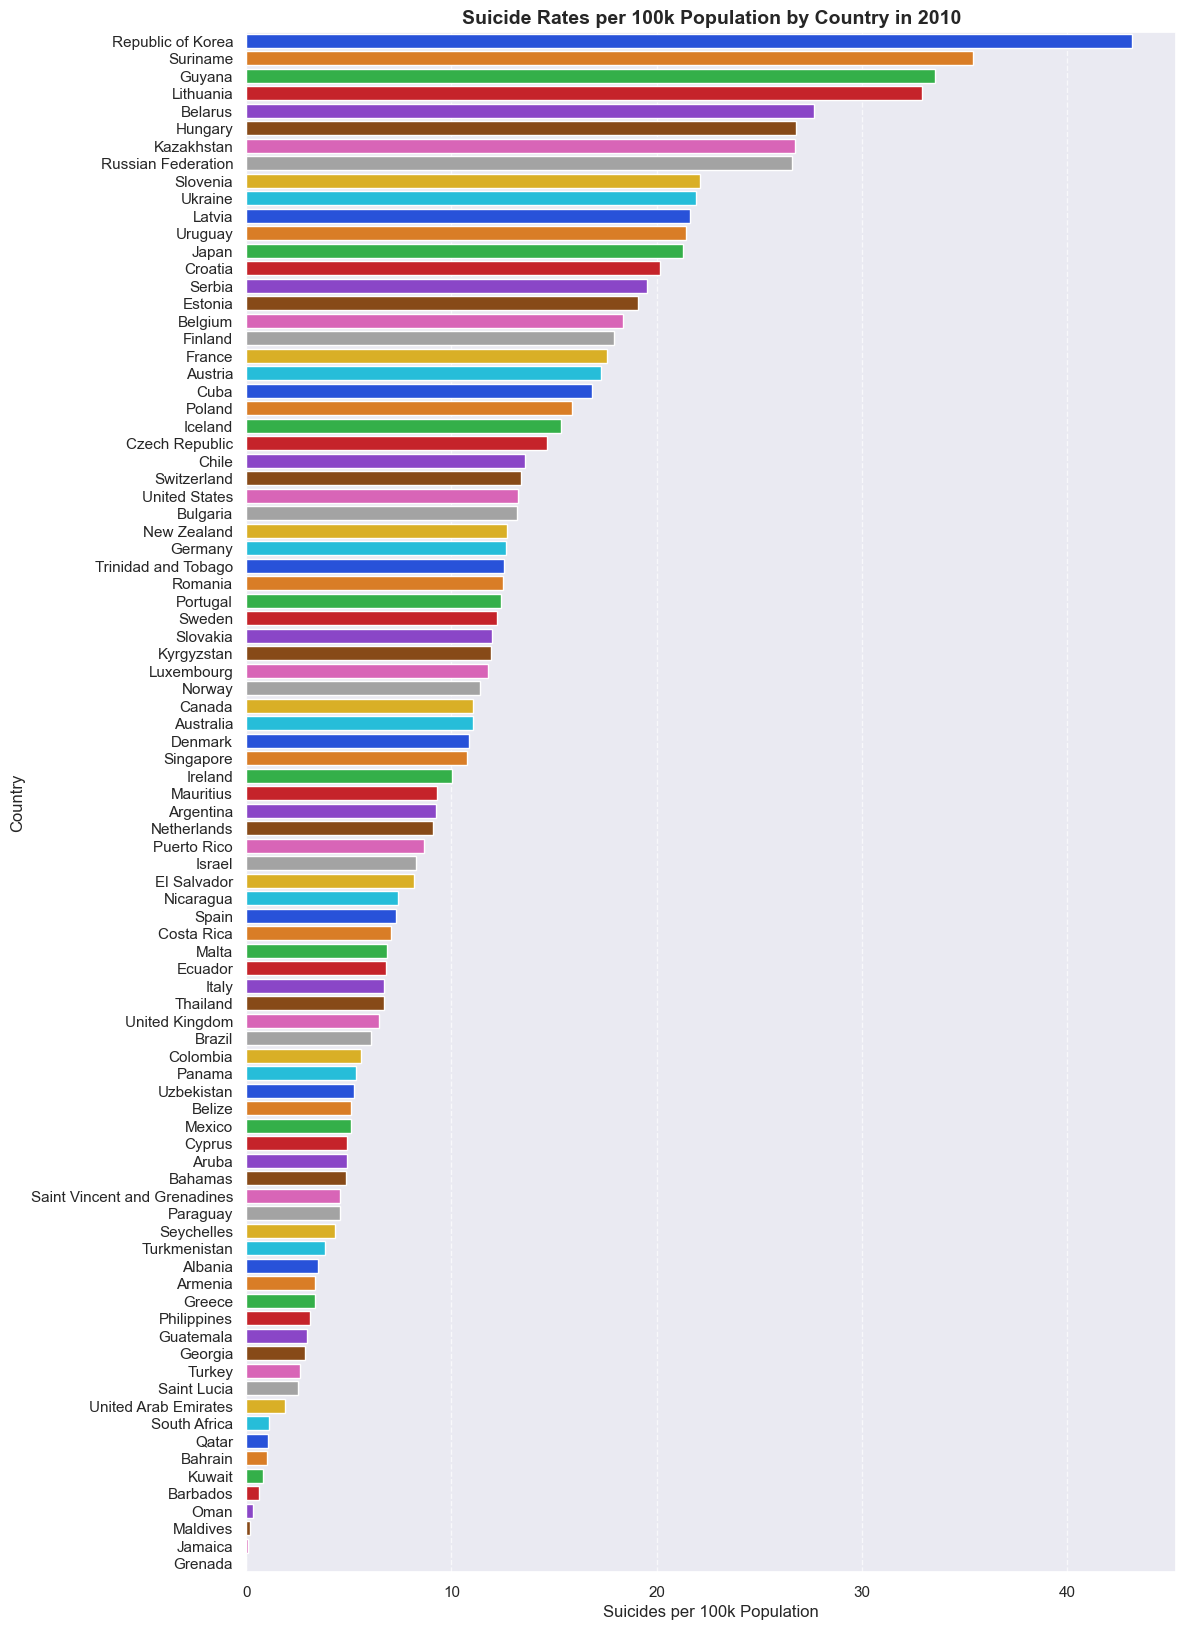

In [106]:
# Visualize the data:
plt.figure(figsize=(12, 20))
sns.barplot(data=country_year_data, x='suicides/100kpop', y='country', palette='bright', hue= "country", legend= False, saturation= 0.7)
plt.title(f'Suicide Rates per 100k Population by Country in {selected_year}', fontsize=14, fontweight='bold')
plt.xlabel('Suicides per 100k Population', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

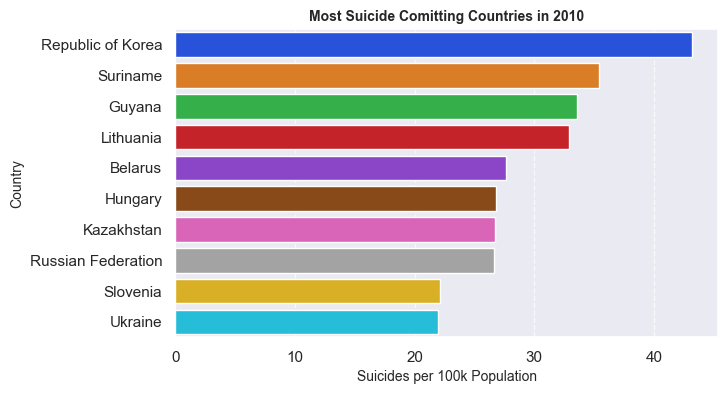

In [107]:
# First 10 countries having higest suicides per 100k population in 2010:
plt.figure(figsize=(7, 4))
sns.barplot(data=country_year_data.sort_values(by= "suicides/100kpop", ascending= False).head(10), x='suicides/100kpop', y='country', palette='bright', hue= "country", legend= False, saturation= 0.7)
plt.title(f'Most Suicide Comitting Countries in {selected_year}', fontsize=10, fontweight='bold')
plt.xlabel('Suicides per 100k Population', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

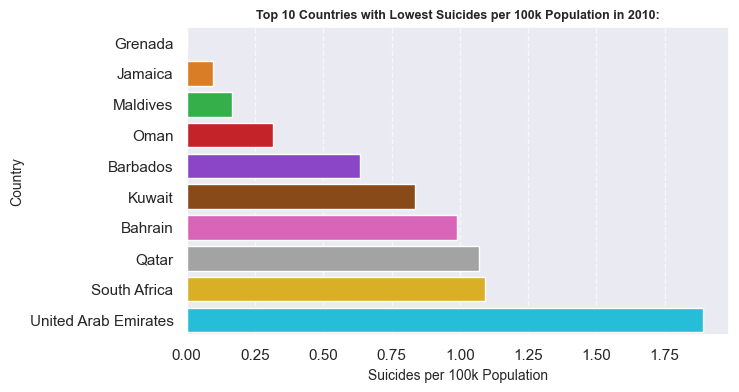

In [108]:
# 10 countries having Lowest suicides per 100k population in 2010:
plt.figure(figsize=(7, 4))
sns.barplot(data=country_year_data.sort_values(by= "suicides/100kpop", ascending= True).head(10), x='suicides/100kpop', y='country', palette='bright', hue= "country", legend= False, saturation= 0.7)
plt.title(f'Top 10 Countries with Lowest Suicides per 100k Population in {selected_year}:', fontsize=9, fontweight='bold')
plt.xlabel('Suicides per 100k Population', fontsize=10)
plt.ylabel('Country', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [109]:
# Highlight outliers:
highest_rate = country_year_data.iloc[0]
lowest_rate = country_year_data.iloc[-1]
print(f"Highest suicide rate in {selected_year}: {highest_rate['country']} ({highest_rate['suicides/100kpop']} per 100k)")
print(f"Lowest suicide rate in {selected_year}: {lowest_rate['country']} ({lowest_rate['suicides/100kpop']} per 100k)")

Highest suicide rate in 2010: Republic of Korea (43.18333333333334 per 100k)
Lowest suicide rate in 2010: Grenada (0.0 per 100k)


- **Republic of Korea** has the highest suicide rate in 2010, followed by **Suriname**, **Guyana**, and **Lithuania**.

- Eastern European countries like **Belarus**, **Hungary**, and **Russia** show consistently high suicide rates, likely due to socio-economic factors.

- Countries like **United States**, **France**, and **Japan** have moderate rates, indicating room for improvement in mental health support.

- **Grenada**, **Jamaica**, and **Maldives** have the lowest rates, possibly due to cultural, social, or reporting differences.

### 22. **Top 5 Countries Over Time:**

1. Calculate the average suicide rate (`suicides/100kpop`) for each country per year.

In [110]:
# Group data by year and country:
yearly_country_data = data.groupby(['year', 'country'])['suicides/100kpop'].mean().reset_index().round(2)
yearly_country_data.head()

year              country  suicides/100kpop
0  1985  Antigua and Barbuda              0.00
1  1985            Argentina             11.21
2  1985            Australia             13.62
3  1985              Austria             32.07
4  1985              Bahamas              0.40

2. For each year, sort the countries by suicide rate and select the top 5.

In [111]:
# Identify top 5 countries per year: 
top_5_countries = (yearly_country_data.groupby('year').apply(lambda x: x.nlargest(5, 'suicides/100kpop')).reset_index(drop=True))
top_5_countries

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_13576\1676117370.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



year    country  suicides/100kpop
0    1985  Sri Lanka             46.56
1    1985   Suriname             39.24
2    1985    Austria             32.07
3    1985  Singapore             29.45
4    1985     France             29.08
..    ...        ...               ...
155  2016  Lithuania             36.17
156  2016    Hungary             24.13
157  2016    Croatia             21.36
158  2016   Mongolia             18.44
159  2016    Austria             18.32

[160 rows x 3 columns]

3. Plot the suicide rate trends for the top 5 countries across all years.

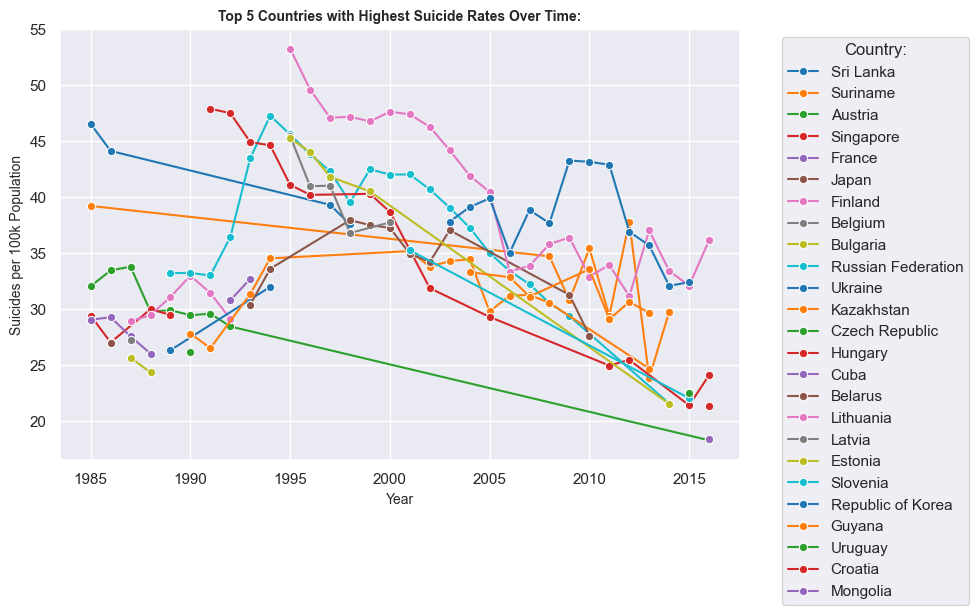

In [112]:
# Visualize trends for top 5 countries:
plt.figure(figsize=(10, 6))
sns.lineplot(data=top_5_countries, x='year', y='suicides/100kpop', hue='country', marker='o', palette='tab10')
plt.title('Top 5 Countries with Highest Suicide Rates Over Time:', fontsize=10, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Suicides per 100k Population', fontsize=10)
plt.legend(title='Country:', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

The plot is obviously messy because, we are plotting top 5 countries per-year having higest number of suicides per 100k population.

From this plot, the top 5 countries with the highest suicide rates over time appear to be:

1. Sri Lanka

2. Suriname

3. Lithuania

4. Russia (Russian Federation)

5. Guyana

These countries consistently show high suicide rates across the years.

### 23. **Gender Ratio of Suicides:**

1.  Aggregate the total number of suicides (`suicides_no`) for males and females separately for each country and year.

In [113]:
# Group data by country, year, and sex
gender_data = data.groupby(['country', 'year', 'sex'])['suicides_no'].sum().reset_index()
gender_data.head(3)

country  year     sex  suicides_no
0  Albania  1987  female           25
1  Albania  1987    male           48
2  Albania  1988  female           22

2. Divide the total male suicides by the total female suicides for each country and year.

In [114]:
# Pivot the data to separate male and female suicide counts
gender_pivot = gender_data.pivot(index=['country', 'year'], columns='sex', values='suicides_no').reset_index()
gender_pivot.head(3)

sex  country  year  female  male
0    Albania  1987      25    48
1    Albania  1988      22    41
2    Albania  1989      15    53

3. If the female suicide count is 0, handle it to avoid division errors (e.g., set the ratio to `NaN` or a large value).

In [115]:
# Calculate the gender ratio (male suicides / female suicides):
gender_pivot['gender_ratio'] = gender_pivot['male'] / gender_pivot['female']

# Handle cases where female suicides are 0:
gender_pivot['gender_ratio'] = gender_pivot['gender_ratio'].replace([np.inf, -np.inf], np.nan)

In [116]:
# Display the results:
print(gender_pivot[['country', 'year', 'gender_ratio']].head())

sex  country  year  gender_ratio
0    Albania  1987      1.920000
1    Albania  1988      1.863636
2    Albania  1989      3.533333
3    Albania  1992      2.357143
4    Albania  1993      1.703704


4. Plot the gender ratio for selected countries or years to analyze trends.

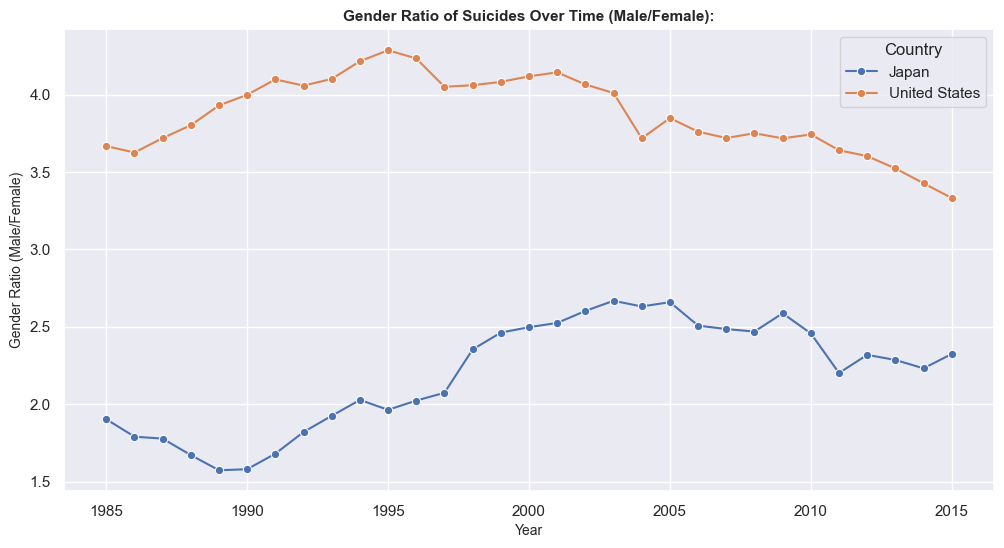

In [117]:
# Visualize the gender ratio for selected countries:
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_pivot[gender_pivot['country'].isin(['United States', 'Russia', 'Japan'])], 
             x='year', y='gender_ratio', hue='country', marker='o')
plt.title('Gender Ratio of Suicides Over Time (Male/Female):', fontsize=11, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Gender Ratio (Male/Female)', fontsize=10)
plt.grid(True)
plt.legend(title='Country')
plt.show()

**`High Gender Ratio`**: indicates societal pressures or stigma preventing males from seeking help. Reflects higher vulnerability of males to suicide.

**`Low Gender Ratio`**: suggests relatively balanced suicide rates or higher female vulnerability in specific contexts.

**`Temporal Trends`**: analyze how the gender ratio changes over time for different countries to identify patterns or interventions.

### 24. **Generational Analysis per Country:**

In [118]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent', 'income_group',
       'conflict_status'],
      dtype='object')

1. Group by `generation` and `country`, sum suicides.

In [119]:
isnato= data.groupby(by= ["generation", "country"])["suicides/100kpop"].sum().round(2).reset_index()
isnato

generation               country  suicides/100kpop
0      Boomers               Albania            162.13
1      Boomers   Antigua and Barbuda             76.79
2      Boomers             Argentina            541.29
3      Boomers               Armenia            187.00
4      Boomers                 Aruba            268.74
..         ...                   ...               ...
585     Silent  United Arab Emirates             33.73
586     Silent        United Kingdom            663.11
587     Silent         United States           1398.03
588     Silent               Uruguay           2442.49
589     Silent            Uzbekistan            491.97

[590 rows x 3 columns]

2. Comparing different generations fare in different nations:

<function matplotlib.pyplot.show(close=None, block=None)>

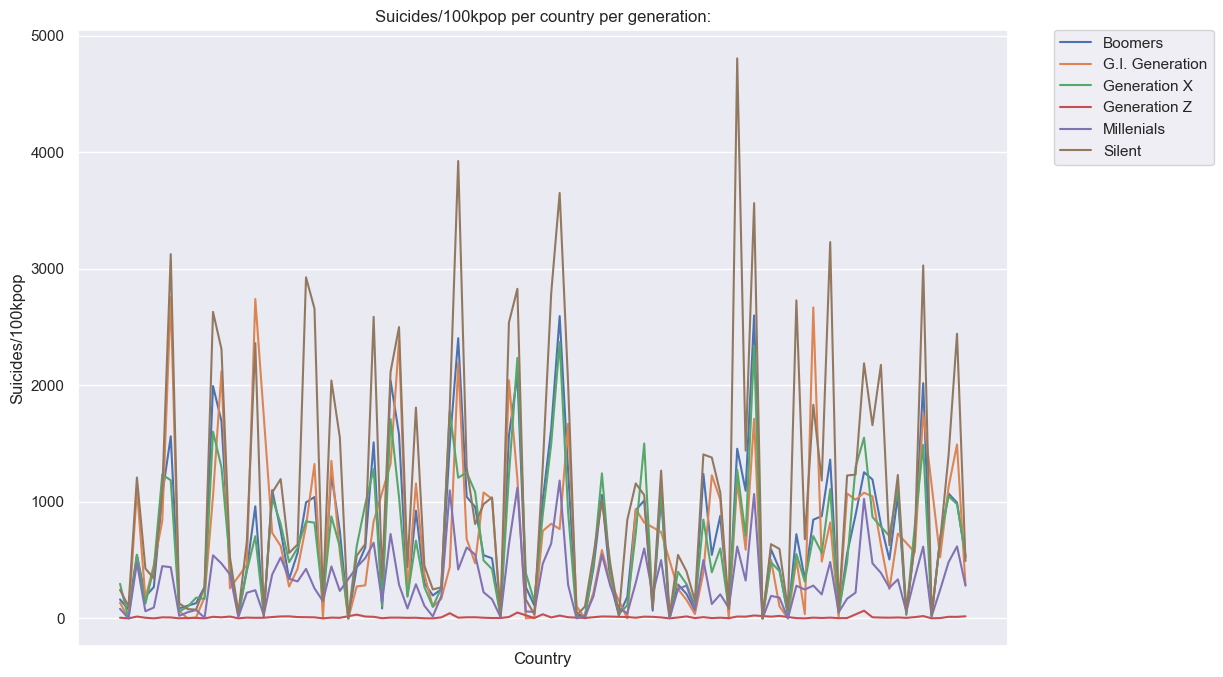

In [120]:
# See the trend of Suicides/100kpop per country per generation: 
plt.figure(figsize=(12, 8))
sns.lineplot(data= isnato, x= "country", y= "suicides/100kpop", hue= "generation")
plt.xticks([]) # To not to display the x-axis ticks
plt.xlabel("Country")
plt.ylabel("Suicides/100kpop")
plt.title("Suicides/100kpop per country per generation:")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show

Obviously, this makes no sense as everything is cluttered.

For better view, I have to filter out the information.

In [121]:
# Select one country: United States; for example:
isnato[isnato["country"]== "United States"]

generation        country  suicides/100kpop
98           Boomers  United States           1071.25
191  G.I. Generation  United States           1127.93
292     Generation X  United States           1048.09
386     Generation Z  United States             13.33
486       Millenials  United States            482.34
587           Silent  United States           1398.03

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_13576\3181285697.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='generation', ylabel='suicides/100kpop'>

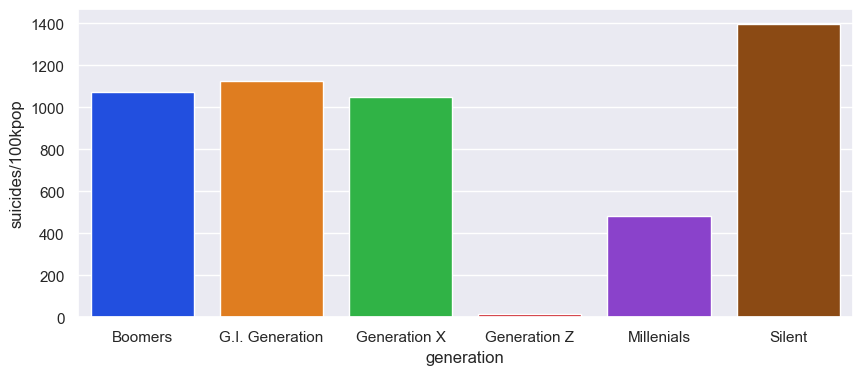

In [122]:
plt.figure(figsize= (10,4))
sns.barplot(data= isnato[isnato["country"]== "United States"], x= isnato[isnato["country"]== "United States"]["generation"], y= isnato[isnato["country"]== "United States"]["suicides/100kpop"], legend= False, palette= "bright")

So, in united States, Silent Generation have high suicide rates whereas Gen-Z have comparatively very low suicide rate.

In [123]:
# Select another country: Japan; for example:
isnato[isnato["country"]== "Japan"]

generation country  suicides/100kpop
46           Boomers   Japan           1568.69
144  G.I. Generation   Japan           2043.49
240     Generation X   Japan           1227.80
340     Generation Z   Japan             11.63
434       Millenials   Japan            634.21
535           Silent   Japan           2539.41

C:\Users\MyMachine\AppData\Local\Temp\ipykernel_13576\2248297876.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='generation', ylabel='suicides/100kpop'>

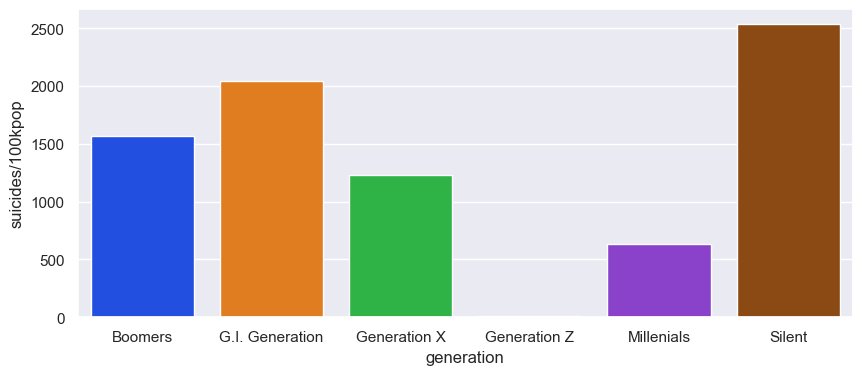

In [124]:
plt.figure(figsize= (10,4))
sns.barplot(data= isnato[isnato["country"]== "Japan"], x= isnato[isnato["country"]== "Japan"]["generation"], y= isnato[isnato["country"]== "Japan"]["suicides/100kpop"], legend= False, palette= "bright")

Again, in case of Japan, `Silent Generation` have high rate whereas `Gen-Z` have almost no suicides.

If I want to plot the suicides rate per generation over different countries over the years then, plot will be very messy and almost useless. For easy referencing, I will select top 10 higest suicide rate countries and plot the suicide rates over the years for `Generation= Boomers`:

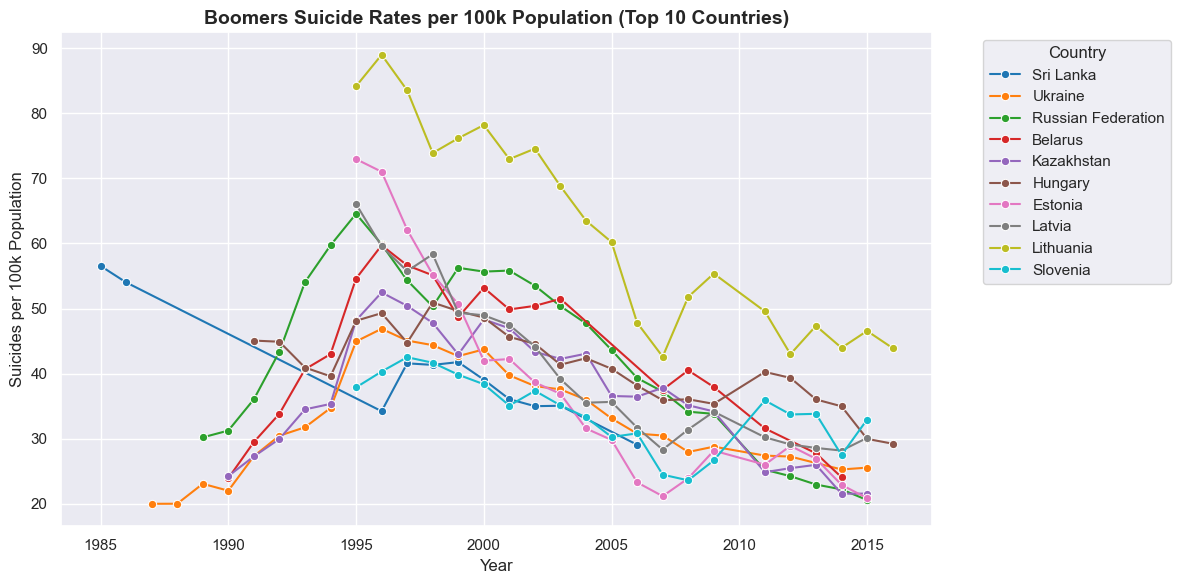

In [125]:
# Filter data for Boomers generation
boomers_data = data[data['generation'] == 'Boomers']

# SGroup data by year and country
boomers_grouped = boomers_data.groupby(['year', 'country'])['suicides/100kpop'].mean().reset_index()

# Select top 10 countries with the highest average suicide rates
top_countries = boomers_grouped.groupby('country')['suicides/100kpop'].mean().nlargest(10).index
filtered_data = boomers_grouped[boomers_grouped['country'].isin(top_countries)]

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='year', y='suicides/100kpop', hue='country', marker='o', palette='tab10')
plt.title('Boomers Suicide Rates per 100k Population (Top 10 Countries)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicides per 100k Population', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

- **`Sri Lanka`** shows a significant decline in suicide rates over the years.

- **`Ukraine`** and the **`Russian Federation`** initially had high rates, but both exhibit a downward trend after peaking.

- **`Belarus`**, **`Kazakhstan`**, and **`Hungary`** show fluctuating patterns with notable peaks.

- **`Estonia`**, **`Latvia`**, and **`Lithuania`** have relatively high rates but also show a gradual decrease over time.

- **`Slovenia`** has lower rates compared to others but also follows a downward trend.

Overall, there is a general tendency toward decreasing suicide rates in most of the countries represented, particularly in the later years.

### 25. **Year with Maximum Global Suicides**:

In [126]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100kpop', 'country-year', 'HDIforyear', 'gdp_for_year()',
       'gdp_per_capita()', 'generation', 'continent', 'income_group',
       'conflict_status'],
      dtype='object')

In [127]:
daa= data.groupby(by= "year")["suicides_no"].sum().sort_values(ascending= False).reset_index().head(10)
daa

year  suicides_no
0  1999       256119
1  2002       256095
2  2003       256079
3  2000       255832
4  2001       250652
5  1998       249591
6  1996       246725
7  1995       243544
8  2009       243487
9  2004       240861

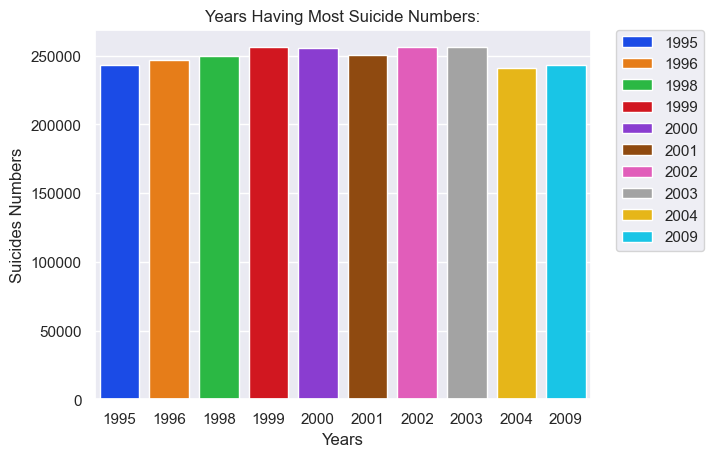

In [128]:
sns.barplot(data= daa, x= "year", y= "suicides_no", hue= "year", palette= "bright", saturation=0.8, )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Years Having Most Suicide Numbers:")
plt.xlabel("Years")
plt.ylabel("Suicides Numbers")
plt.show()

So, `1999` is the year having maximum number of suicides worldwide.

Yearly Suicides:
    year  suicides_no
0   1985       116063
1   1986       120670
2   1987       126842
3   1988       121026
4   1989       160244
5   1990       193361
6   1991       198020
7   1992       211473
8   1993       221565
9   1994       232063
10  1995       243544
11  1996       246725
12  1997       240745
13  1998       249591
14  1999       256119
15  2000       255832
16  2001       250652
17  2002       256095
18  2003       256079
19  2004       240861
20  2005       234375
21  2006       233361
22  2007       233408
23  2008       235447
24  2009       243487
25  2010       238702
26  2011       236484
27  2012       230160
28  2013       223199
29  2014       222984
30  2015       203640
31  2016        15603

The year with maximum global suicides is 1999 with 256119 suicides.


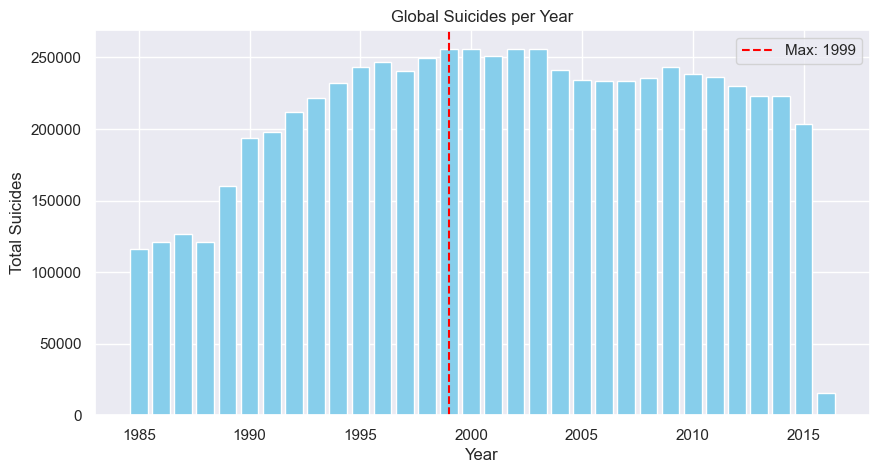

In [129]:
# Group the data by year and sum the total number of suicides
yearly_suicides = data.groupby("year")["suicides_no"].sum().reset_index()

# Print the yearly totals (optional)
print("Yearly Suicides:")
print(yearly_suicides)

# Find the year with maximum global suicides
max_year = yearly_suicides.loc[yearly_suicides["suicides_no"].idxmax()]
print(f"\nThe year with maximum global suicides is {max_year['year']} with {max_year['suicides_no']} suicides.")

plt.figure(figsize=(10, 5))
plt.bar(yearly_suicides["year"], yearly_suicides["suicides_no"], color="skyblue")
plt.xlabel("Year")
plt.ylabel("Total Suicides")
plt.title("Global Suicides per Year")
plt.axvline(x=max_year["year"], color="red", linestyle="--", 
            label=f"Max: {int(max_year['year'])}")
plt.legend()
plt.show()

If we compare total number of suicides every year from 1985-2016, we clearly see that, total global suicides increases from 1985 to about 2000s where peak is during the year 1999. From 2000 to 2004-2005, the numbers remains almost consistent and after 2005-2006, the total numbers gradually start to decrease and in 2015, a very sharp decline in total suicides numbers was seenhis decline may be due to incomplete data collection during the later period of data collection phase or may be due to some other reasons.

---
----
-----

## **F. EXPLORATORY & ADVANCED SCENARIOS:**

### 26. **Detect Anomalies in Suicide Trends:**

To detect anomalies in suicide trends, we can use statistical methods like `Z-scores` or `rolling averages` to identify `spikes` or `dips` in the data. 

**`Rolling Mean and Std`**: Smoothens the data to calculate a `"normal range."`    

**`Z-scores`**: Measures how far a value deviates from the mean in terms of standard deviations.   

**`Anomalies`**: Highlight years where suicide numbers deviate significantly from the norm.   

1. **Calculate Rolling Averages**: Smooth the data to identify deviations.

In [130]:
# Group data by year and sum suicides:
yearly_suicides = data.groupby("year")["suicides_no"].sum().reset_index()
yearly_suicides.head()

year  suicides_no
0  1985       116063
1  1986       120670
2  1987       126842
3  1988       121026
4  1989       160244

In [131]:
# Calculate rolling mean and standard deviation: 
yearly_suicides["rolling_mean"] = yearly_suicides["suicides_no"].rolling(window=3, center=True).mean()
yearly_suicides["rolling_std"] = yearly_suicides["suicides_no"].rolling(window=3, center=True).std()

In [132]:
yearly_suicides.columns

Index(['year', 'suicides_no', 'rolling_mean', 'rolling_std'], dtype='object')

2. **Compute Z-scores**: Identify years with unusually high or low suicide numbers.

In [133]:
# Calculate Z-scores to detect anomalies:
yearly_suicides["z_score"] = (yearly_suicides["suicides_no"] - yearly_suicides["rolling_mean"]) / yearly_suicides["rolling_std"]

In [134]:
yearly_suicides.columns

Index(['year', 'suicides_no', 'rolling_mean', 'rolling_std', 'z_score'], dtype='object')

In [135]:
yearly_suicides["z_score"].max() # To get the maximum Z-Score

np.float64(1.1531761119708486)

In [136]:
# Define anomalies (e.g., Z-score > 2 or < -2)
anomalies = yearly_suicides[np.abs(yearly_suicides["z_score"]) > 2]

3. **Visualize Anomalies**: Highlight anomalies on a line plot.

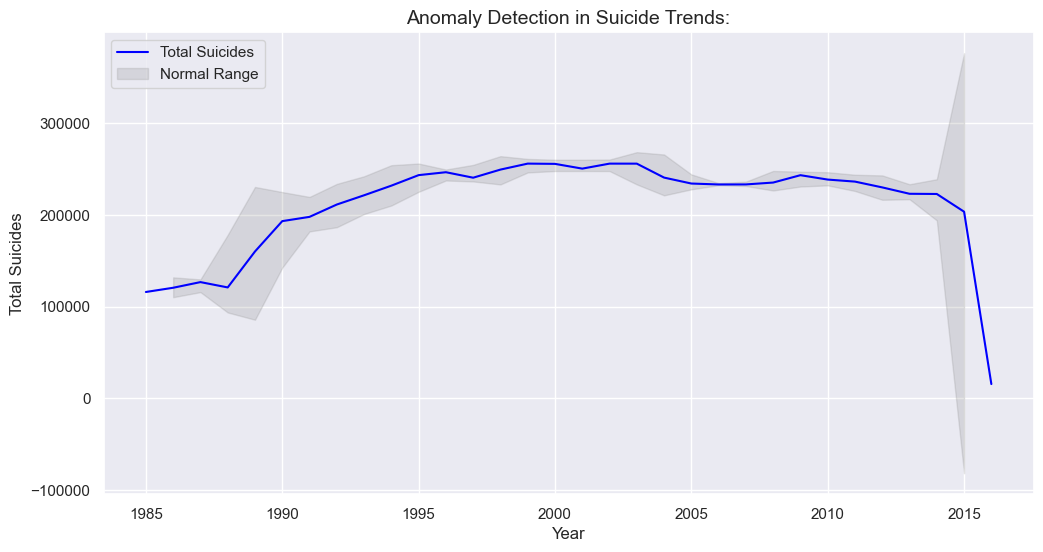

In [137]:
# Plot the data:
plt.figure(figsize=(12, 6))

# Plot lineplot for Yearly Suicide Numbers:
sns.lineplot(data=yearly_suicides, x="year", y="suicides_no", label="Total Suicides", color="blue")

# Plot the fill area plot for 2 std from rolling mean:
plt.fill_between(x= yearly_suicides["year"], y1= yearly_suicides["rolling_mean"] - 2 * yearly_suicides["rolling_std"], y2= yearly_suicides["rolling_mean"] + 2 * yearly_suicides["rolling_std"], color="gray", alpha=0.2, label="Normal Range")

# Plot scatter plot to show if the observations that fall outside the defined range in RED COLOR:   
sns.scatterplot(data=anomalies, x="year", y="suicides_no", color="red", label="Anomalies", s=100)

plt.title("Anomaly Detection in Suicide Trends:", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Suicides")
plt.legend()
plt.grid(True)
plt.show()

In [138]:
# Print anomalies
print("Detected Anomalies:")
print(anomalies[["year", "suicides_no", "z_score"]])

Detected Anomalies:
Empty DataFrame
Columns: [year, suicides_no, z_score]
Index: []


The maximum `Z-score` value of `1.1531761119708486` indicates that there are no significant anomalies in the suicide trends, as it does not exceed the threshold of `2` (commonly used to detect anomalies). This suggests that the yearly suicide data follows a relatively consistent pattern without extreme deviations.

1. **Blue Line (Total Suicides)**:
   - Represents the total number of suicides per year.

   - Shows a steady increase from 1985 to around 2000, followed by a gradual decline until 2015.

2. **Gray Shaded Area (Normal Range)**:
   - Represents the range within two standard deviations of the rolling mean.
   
   - The total suicides remain within this range, confirming no significant anomalies.

3. **No Red Points (Anomalies)**:
   - Since no Z-scores exceed the threshold of `2`, no anomalies are highlighted on the plot.

> **The trends in suicide numbers are consistent with no unusual spikes or dips.**

> **The observed patterns may reflect global socio-economic changes, population growth, or reporting practices rather than sudden, unexpected events.**

### 28. **Compare Suicide Rate vs GDP Trends per Country:**

In [139]:
# First, select a few major countries for comparison:
selected_countries = ['United States', 'Japan', 'Russian Federation', 'Germany', 'United Kingdom']

# Create a filtered dataset for selected countries:
country_trends = data[data['country'].isin(selected_countries)]
country_trends

country  year     sex     age  suicides_no  population  \
9710         Germany  1990    male    75+          1516     1717700   
9711         Germany  1990    male  55-74          2406     6593100   
9712         Germany  1990    male  35-54          3302    11127100   
9713         Germany  1990  female    75+          1174     3978800   
9714         Germany  1990    male  25-34          1488     6721200   
...              ...   ...     ...     ...          ...         ...   
27215  United States  2015  female  25-34          1444    21555712   
27216  United States  2015  female  15-24          1132    21633813   
27217  United States  2015  female    75+           540    11778666   
27218  United States  2015    male   5-14           255    21273987   
27219  United States  2015  female   5-14           158    20342901   

       suicides/100kpop        country-year  HDIforyear  gdp_for_year()  \
9710              88.26        Germany-1990    0.801000   1764967948917   
9711              36.49        Germany-1990    0.801000   1764967948917   
9712              29.68        Germany-1990    0.801000   1764967948917   
9713              29.51        Germany-1990    0.801000   1764967948917   
9714              22.14        Germany-1990    0.801000   1764967948917   
...                 ...                 ...         ...             ...   
27215              6.70  United States-2015    0.730168  18120714000000   
27216              5.23  United States-2015    0.730168  18120714000000   
27217              4.58  United States-2015    0.730168  18120714000000   
27218              1.20  United States-2015    0.730168  18120714000000   
27219              0.78  United States-2015    0.730168  18120714000000   

       gdp_per_capita()       generation      continent income_group  \
9710              23546  G.I. Generation         Europe         High   
9711              23546  G.I. Generation         Europe         High   
9712              23546           Silent         Europe         High   
9713              23546  G.I. Generation         Europe         High   
9714              23546          Boomers         Europe         High   
...                 ...              ...            ...          ...   
27215             60387       Millenials  North America         High   
27216             60387       Millenials  North America         High   
27217             60387           Silent  North America         High   
27218             60387     Generation Z  North America         High   
27219             60387     Generation Z  North America         High   

      conflict_status  
9710         Peaceful  
9711         Peaceful  
9712         Peaceful  
9713         Peaceful  
9714         Peaceful  
...               ...  
27215        Peaceful  
27216        Peaceful  
27217        Peaceful  
27218        Peaceful  
27219        Peaceful  

[1752 rows x 15 columns]

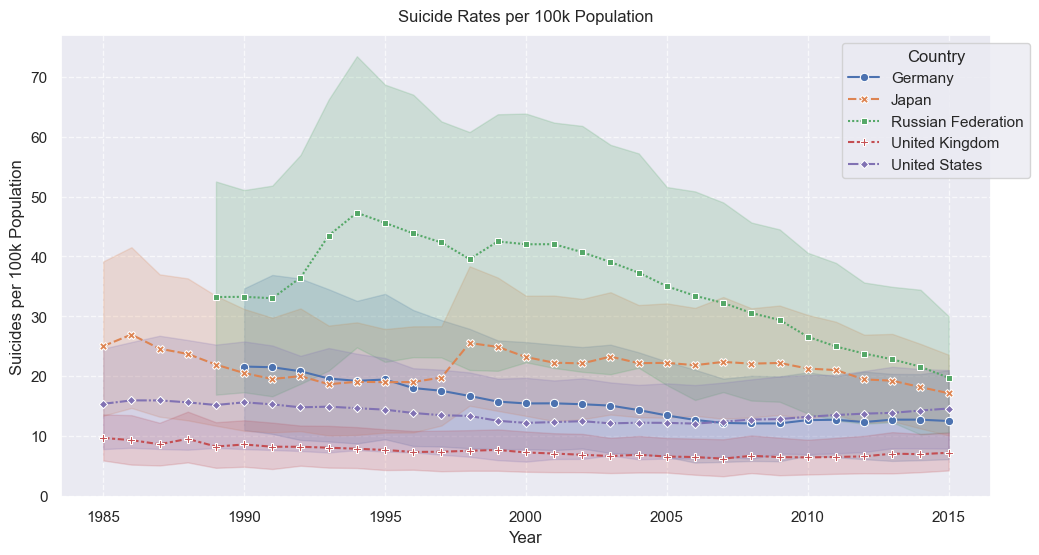

In [140]:
plt.figure(figsize= (12, 6))
# Plot suicide rates trend:
sns.lineplot(data=country_trends, 
            x='year', 
            y='suicides/100kpop',
            hue='country',
            style='country',
            markers=True,
            )
plt.title('Suicide Rates per 100k Population', fontsize=12, pad=10)
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1))
plt.show()

This plot shows the suicide rates per 100k population for  countries (`Germany, Japan, Russian Federation, United Kingdom, and United States`) from 1985 to 2015. 

1. **Russian Federation** has the highest suicide rates, peaking in the 1990s, followed by a gradual decline.

2. **Japan** shows consistently moderate rates with slight fluctuations.

3. **United States**, **United Kingdom**, and **Germany** have relatively lower and stable rates over time.

4. Overall, most countries exhibit a declining trend in suicide rates after the 2000s.

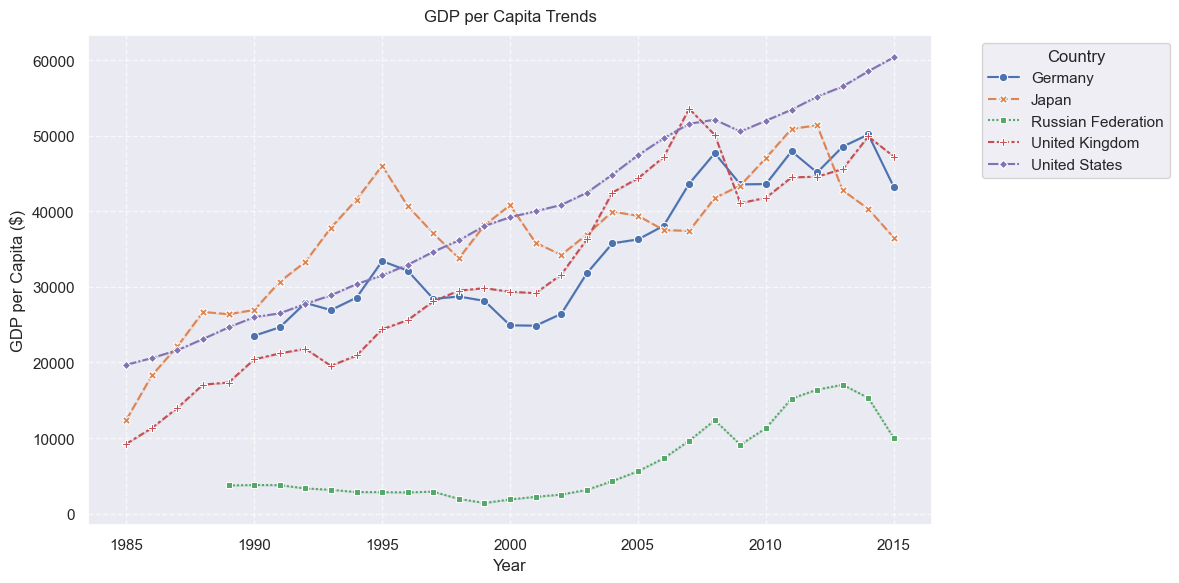

In [141]:
plt.figure(figsize= (12, 6))
# Plot GDP trend:
sns.lineplot(data=country_trends, 
            x='year', 
            y='gdp_per_capita()',
            hue='country',
            style='country',
            markers=True,
            )

plt.title('GDP per Capita Trends', fontsize=12, pad=10)
plt.xlabel('Year')
plt.ylabel('GDP per Capita ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1))

# Adjust layout
plt.tight_layout()
plt.show()

This shows GDP per capita trends for selected countries (Germany, Japan, Russian Federation, United Kingdom, and United States) from 1985 to 2015:

1. **United States** has the highest and steadily increasing GDP per capita, followed by **Germany** and **United Kingdom**.

2. **Japan** shows fluctuations but remains relatively high.

3. **Russian Federation** has the lowest GDP per capita, with a sharp decline in the 1990s, followed by gradual recovery.

4. Overall, most countries exhibit growth in GDP per capita over time.

In [142]:
# Calculate correlation between GDP and suicide rates for each country
print("\nCorrelation between GDP and Suicide Rates by Country:")
print("-" * 50)

for country in selected_countries:
    country_data = data[data['country'] == country]
    correlation = country_data['suicides/100kpop'].corr(country_data['gdp_per_capita()'])
    print(f"{country:20} : {correlation:.3f}")


Correlation between GDP and Suicide Rates by Country:
--------------------------------------------------
United States        : -0.061
Japan                : -0.071
Russian Federation   : -0.205
Germany              : -0.146
United Kingdom       : -0.136


In [143]:
# Calculate correlation between GDP and suicide rates for each country
print("\nCorrelation between GDP and Suicide Rates by Country:")
print("-" * 50)

for country in selected_countries:
    country_data = data[data['country'] == country]
    correlation = country_data['suicides/100kpop'].corr(country_data['gdp_per_capita()'])
    print(f"{country:20} : {correlation:.3f}")


Correlation between GDP and Suicide Rates by Country:
--------------------------------------------------
United States        : -0.061
Japan                : -0.071
Russian Federation   : -0.205
Germany              : -0.146
United Kingdom       : -0.136


In [144]:
# Calculate correlation between GDP and suicide rates for each country
print("\nCorrelation between GDP and Suicide Rates by Country:")
print("-" * 50)

for country in selected_countries:
    country_data = data[data['country'] == country]
    correlation = country_data['suicides/100kpop'].corr(country_data['gdp_per_capita()'])
    print(f"{country:20} : {correlation:.3f}")


Correlation between GDP and Suicide Rates by Country:
--------------------------------------------------
United States        : -0.061
Japan                : -0.071
Russian Federation   : -0.205
Germany              : -0.146
United Kingdom       : -0.136


In [145]:
# Calculate correlation between GDP and suicide rates for each country
print("\nCorrelation between GDP and Suicide Rates by Country:")
print("-" * 50)

for country in selected_countries:
    country_data = data[data['country'] == country]
    correlation = country_data['suicides/100kpop'].corr(country_data['gdp_per_capita()'])
    print(f"{country:20} : {correlation:.3f}")


Correlation between GDP and Suicide Rates by Country:
--------------------------------------------------
United States        : -0.061
Japan                : -0.071
Russian Federation   : -0.205
Germany              : -0.146
United Kingdom       : -0.136


In [146]:
# Calculate correlation between GDP and suicide rates for each country
print("\nCorrelation between GDP and Suicide Rates by Country:")
print("-" * 50)

for country in selected_countries:
    country_data = data[data['country'] == country]
    correlation = country_data['suicides/100kpop'].corr(country_data['gdp_per_capita()'])
    print(f"{country:20} : {correlation:.3f}")


Correlation between GDP and Suicide Rates by Country:
--------------------------------------------------
United States        : -0.061
Japan                : -0.071
Russian Federation   : -0.205
Germany              : -0.146
United Kingdom       : -0.136


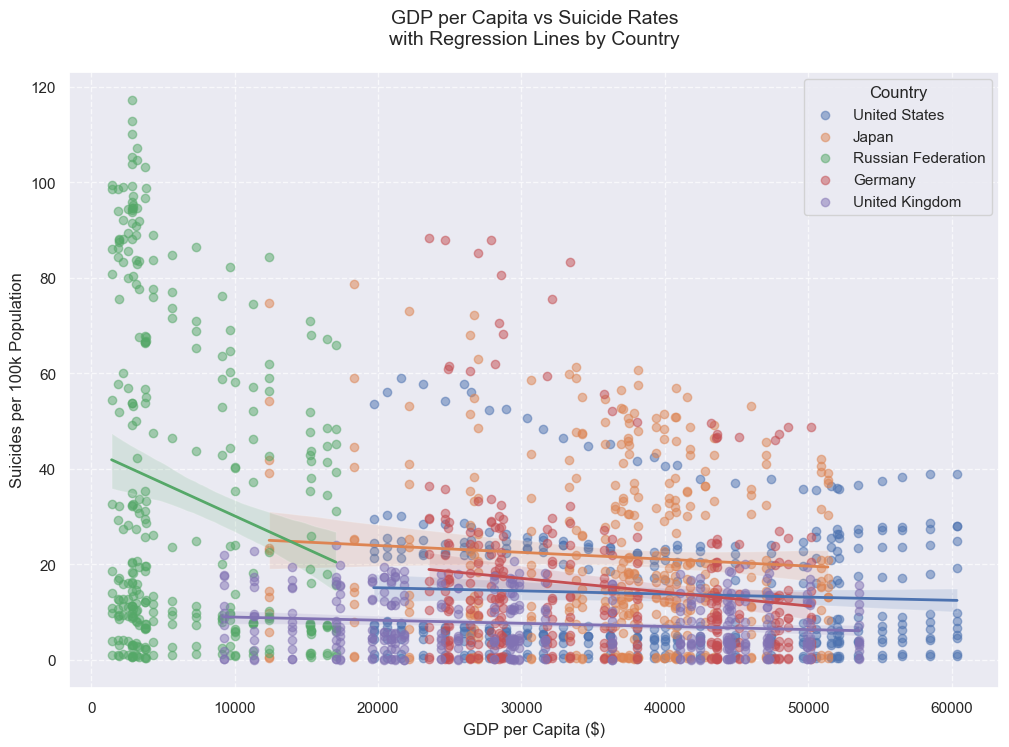

In [147]:
# Create a scatter plot with regression lines for each country
plt.figure(figsize=(12, 8))
for country in selected_countries:
    country_data = data[data['country'] == country]
    sns.regplot(data=country_data, 
                x='gdp_per_capita()', 
                y='suicides/100kpop',
                scatter=True,
                label=country,
                scatter_kws={'alpha':0.5},
                line_kws={'linewidth':2})

plt.title('GDP per Capita vs Suicide Rates\nwith Regression Lines by Country', fontsize=14, pad=20)
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicides per 100k Population')
plt.legend(title='Country')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

This shows relationship between GDP per capita and suicide rates per 100k population for selected countries:

1. **Russian Federation** (green): Displays a negative correlation, with higher suicide rates at lower GDP per capita, indicating economic challenges may contribute to higher suicide rates.

2. **United States, Germany, United Kingdom, and Japan**: Show relatively flat regression lines, suggesting weak or no significant correlation between GDP per capita and suicide rates.

3. **Overall Insight**: Higher GDP per capita does not consistently correlate with lower suicide rates, indicating that other factors (e.g., cultural, social, or mental health resources) may play a more significant role.

In [148]:
# Calculate summary statistics
summary_stats = data.groupby('country').agg({
    'suicides/100kpop': ['mean', 'std'],
    'gdp_per_capita()': ['mean', 'std']
}).round(2)

print("\nSummary Statistics for Selected Countries:")
print("-" * 50)
print(summary_stats.loc[selected_countries])


Summary Statistics for Selected Countries:
--------------------------------------------------
                   suicides/100kpop        gdp_per_capita()          
                               mean    std             mean       std
country                                                              
United States                 13.82  13.23         39269.61  12334.12
Japan                         21.57  17.58         36397.55   8654.62
Russian Federation            34.89  33.21          6518.81   4974.67
Germany                       15.56  17.26         35164.23   8716.93
United Kingdom                 7.50   6.11         31908.35  12736.02


### 29. **Suicide Contribution by Age within Country:**

In [149]:
# Calculate the percentage contribution of each age group within countries:
def calculate_age_contribution(df):
    # Calculate total suicides for each country
    country_total = df.groupby('country')['suicides_no'].sum().reset_index()
    
    # Calculate suicides by country and age group
    age_country = df.groupby(['country', 'age'])['suicides_no'].sum().reset_index()
    
    # Merge with country totals
    age_country = age_country.merge(country_total, on='country', suffixes=('', '_total'))
    
    # Calculate percentage
    age_country['percentage'] = (age_country['suicides_no'] / age_country['suicides_no_total'] * 100).round(2)
    
    return age_country

# Calculate age contributions
age_contributions = calculate_age_contribution(data)
age_contributions

country     age  suicides_no  suicides_no_total  percentage
0       Albania  15-24           546               1970       27.72
1       Albania  25-34           427               1970       21.68
2       Albania  35-54           591               1970       30.00
3       Albania   5-14            61               1970        3.10
4       Albania  55-74           264               1970       13.40
..          ...     ...          ...                ...         ...
600  Uzbekistan  25-34          8578              34803       24.65
601  Uzbekistan  35-54         10964              34803       31.50
602  Uzbekistan   5-14          1376              34803        3.95
603  Uzbekistan  55-74          3595              34803       10.33
604  Uzbekistan    75+           617              34803        1.77

[605 rows x 5 columns]

In [150]:
# Select top 10 countries with highest total suicides for focused visualization:
top_10_countries = data.groupby('country')['suicides_no'].sum().nlargest(10).index

# Filter data for top 10 countries
top_countries_data = age_contributions[age_contributions['country'].isin(top_10_countries)]

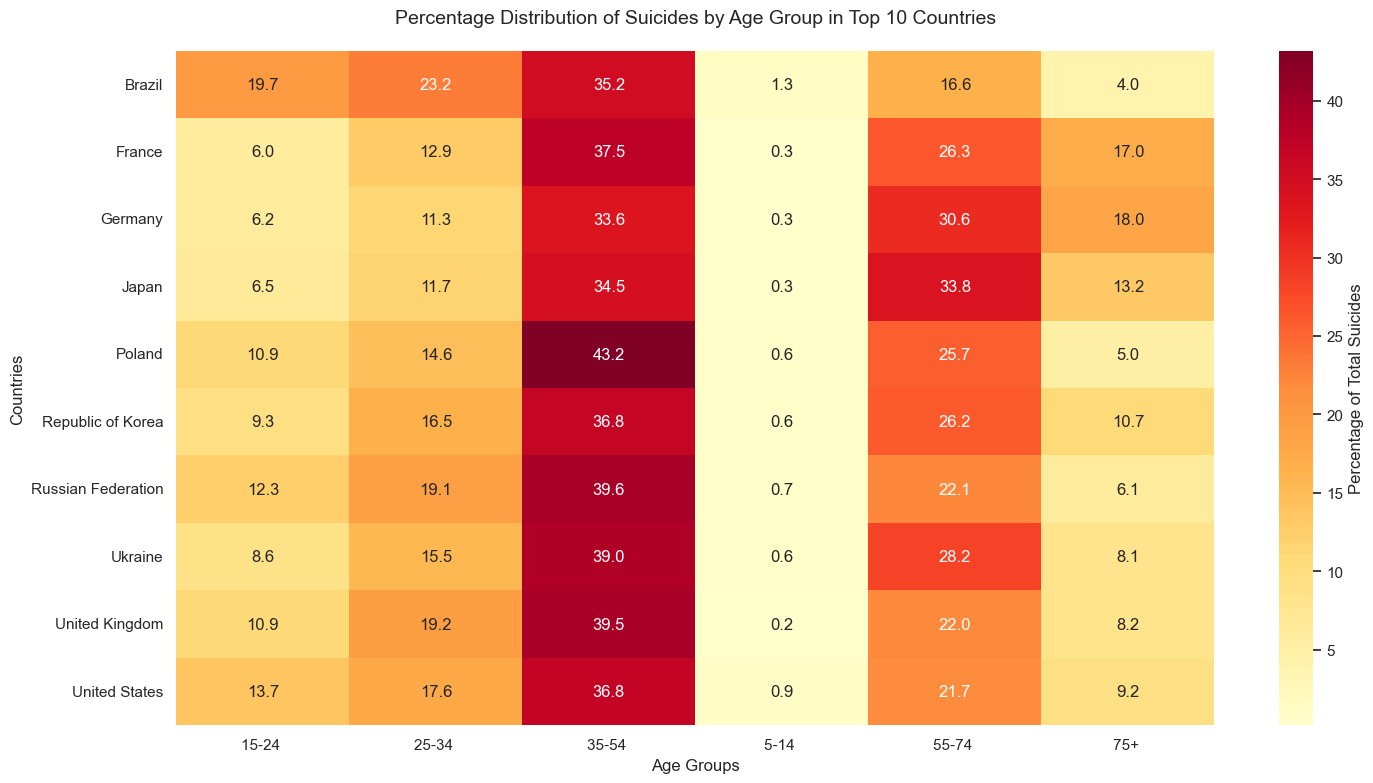

In [151]:
# Create a heatmap for top 10 countries
plt.figure(figsize=(15, 8))
heatmap_data = top_countries_data.pivot(index='country', columns='age', values='percentage')
sns.heatmap(heatmap_data, 
            annot=True, 
            fmt='.1f', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Percentage of Total Suicides'})

plt.title('Percentage Distribution of Suicides by Age Group in Top 10 Countries', 
          fontsize=14, 
          pad=20)
plt.xlabel('Age Groups')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

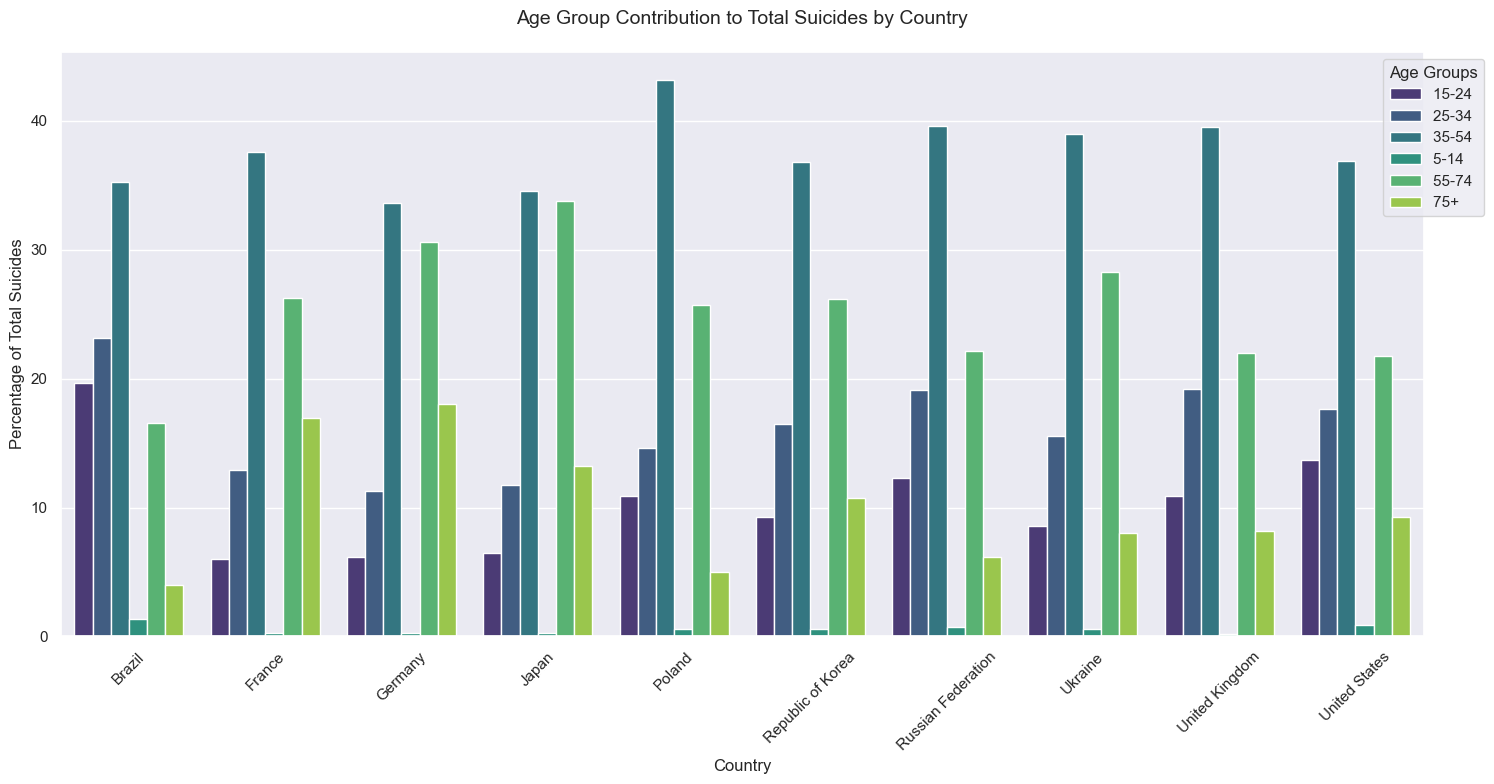

In [152]:
# Create a stacked bar chart
plt.figure(figsize=(15, 8))
sns.barplot(data=top_countries_data, 
           x='country', 
           y='percentage', 
           hue='age',
           palette='viridis')

plt.title('Age Group Contribution to Total Suicides by Country', 
         fontsize=14, 
         pad=20)
plt.xlabel('Country')
plt.ylabel('Percentage of Total Suicides')
plt.xticks(rotation=45)
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [153]:
# Calculate and display summary statistics
print("\nSummary of Age Group Contributions Across All Countries:")
print("-" * 60)
summary_stats = age_contributions.groupby('age')['percentage'].agg(['mean', 'min', 'max']).round(2)
print(summary_stats)


Summary of Age Group Contributions Across All Countries:
------------------------------------------------------------
         mean    min    max
age                        
15-24   16.00   0.00  43.40
25-34   19.84   7.23  46.87
35-54   34.61  20.75  54.55
5-14     1.56   0.00  11.32
55-74   20.45   0.00  50.00
75+      7.56   0.00  21.43


In [154]:
# Identify countries with highest percentage for each age group
print("\nCountries with Highest Percentage for Each Age Group:")
print("-" * 60)
for age_group in data['age'].unique():
    country_max = age_contributions[age_contributions['age'] == age_group].nlargest(1, 'percentage')
    print(f"\nAge Group: {age_group}")
    print(f"Country: {country_max['country'].values[0]}")
    print(f"Percentage: {country_max['percentage'].values[0]:.2f}%")


Countries with Highest Percentage for Each Age Group:
------------------------------------------------------------

Age Group: 15-24 
Country: Kiribati
Percentage: 43.40%

Age Group: 35-54 
Country: Antigua and Barbuda
Percentage: 54.55%

Age Group: 75+ 
Country: Portugal
Percentage: 21.43%

Age Group: 25-34 
Country: Bahrain
Percentage: 46.87%

Age Group: 55-74 
Country: San Marino
Percentage: 50.00%

Age Group: 5-14 
Country: Kiribati
Percentage: 11.32%


In [155]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

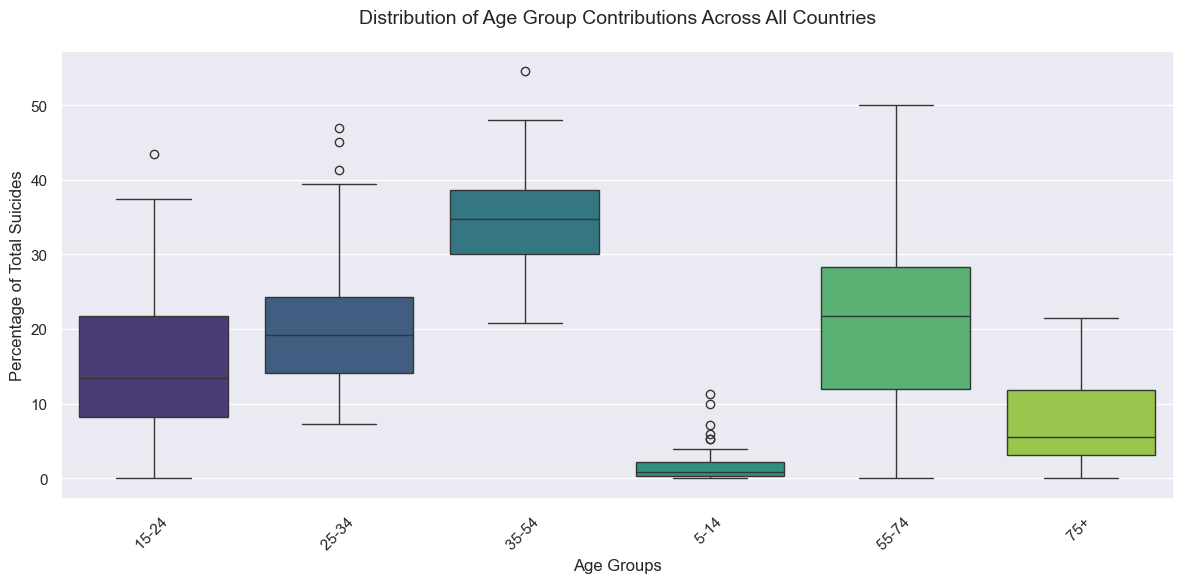

In [156]:
# Create boxplots to show distribution of age group contributions
plt.figure(figsize=(12, 6))
sns.boxplot(data=age_contributions, x='age', y='percentage', palette='viridis')
plt.title('Distribution of Age Group Contributions Across All Countries', 
         fontsize=14, 
         pad=20)
plt.xlabel('Age Groups')
plt.ylabel('Percentage of Total Suicides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [157]:
# Calculate global average age distribution
global_age_dist = data.groupby('age')['suicides_no'].sum()
global_age_percentage = (global_age_dist / global_age_dist.sum() * 100).round(2)

print("\nGlobal Average Age Distribution of Suicides:")
print("-" * 60)
for age, percentage in global_age_percentage.items():
    print(f"{age:20} : {percentage:.2f}%")


Global Average Age Distribution of Suicides:
------------------------------------------------------------
15-24                : 11.98%
25-34                : 16.65%
35-54                : 36.34%
5-14                 : 0.77%
55-74                : 24.58%
75+                  : 9.68%


### 30. **Evaluate Effect of Development Over Time:**

In [159]:
# Prepare the data for analysis:
def prepare_development_data(df):
    # Calculate yearly averages
    yearly_data = df.groupby('year').agg({'suicides/100kpop': 'mean','gdp_per_capita()': 'mean','HDIforyear': 'mean'}).reset_index()
    
    # Calculate percentage changes from baseline year (1985):
    baseline_year = yearly_data.iloc[0]
    yearly_data['suicide_rate_change'] = ((yearly_data['suicides/100kpop'] - baseline_year['suicides/100kpop']) / 
                                        baseline_year['suicides/100kpop'] * 100).round(2)
    yearly_data['gdp_change'] = ((yearly_data['gdp_per_capita()'] - baseline_year['gdp_per_capita()']) / 
                                baseline_year['gdp_per_capita()'] * 100).round(2)
    
    return yearly_data

# Calculate development metrics
development_trends = prepare_development_data(data)
development_trends

year  suicides/100kpop  gdp_per_capita()  HDIforyear  suicide_rate_change  \
0   1985         11.826198       6091.229167    0.708734                 0.00   
1   1986         11.423333       7126.104167    0.763601                -3.41   
2   1987         11.644213       8712.592593    0.767485                -1.54   
3   1988         12.709405       9983.857143    0.771115                 7.47   
4   1989         12.879071       9725.038462    0.771658                 8.90   
5   1990         12.862956       9806.328125    0.723050                 8.77   
6   1991         13.438880      10132.937500    0.774566                13.64   
7   1992         13.498564      10506.707692    0.777584                14.14   
8   1993         13.833705      10553.584615    0.777298                16.98   
9   1994         14.073272      11567.102941    0.776822                19.00   
10  1995         15.662671      12669.346154    0.740097                32.44   
11  1996         15.305422      12554.909091    0.778289                29.42   
12  1997         14.954361      12336.142857    0.777502                26.45   
13  1998         14.926920      12137.898734    0.777543                26.22   
14  1999         14.532038      12832.192771    0.778799                22.88   
15  2000         13.941328      12466.546512    0.755435                17.89   
16  2001         13.519138      12005.579545    0.776353                14.32   
17  2002         13.786550      12613.779070    0.775632                16.58   
18  2003         13.205019      14716.186047    0.775632                11.66   
19  2004         12.481944      17753.904762    0.775327                 5.54   
20  2005         12.068442      20155.964286    0.777517                 2.05   
21  2006         11.927461      21140.964706    0.775015                 0.86   
22  2007         12.025339      23943.430233    0.776987                 1.68   
23  2008         11.907686      26408.047059    0.777099                 0.69   
24  2009         11.400787      22607.910112    0.775618                -3.60   
25  2010         11.215900      23857.193182    0.792298                -5.16   
26  2011         11.015349      26100.918605    0.792986                -6.86   
27  2012         11.421718      26808.950617    0.803211                -3.42   
28  2013         11.107958      28032.675000    0.806838                -6.07   
29  2014         11.011464      27420.141026    0.807001                -6.89   
30  2015         11.094073      26231.193548    0.777856                -6.19   
31  2016         13.421187      25665.125000    0.794240                13.49   

    gdp_change  
0         0.00  
1        16.99  
2        43.04  
3        63.91  
4        59.66  
5        60.99  
6        66.35  
7        72.49  
8        73.26  
9        89.90  
10      107.99  
11      106.11  
12      102.52  
13       99.27  
14      110.67  
15      104.66  
16       97.10  
17      107.08  
18      141.60  
19      191.47  
20      230.90  
21      247.07  
22      293.08  
23      333.54  
24      271.16  
25      291.66  
26      328.50  
27      340.12  
28      360.21  
29      350.16  
30      330.64  
31      321.35

**Trend Analysis:**    

I compares percentage changes in suicide rates and GDP from the baseline year. This shows whether improvements in economic conditions correlate with changes in suicide rates!

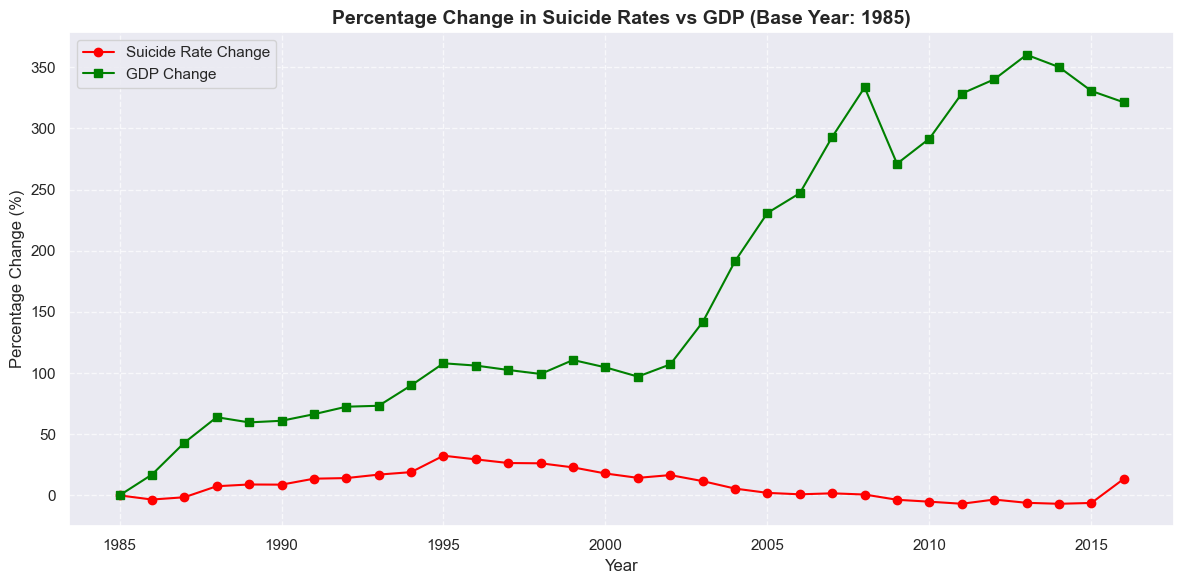

In [160]:
# Create a multi-line plot showing trends:
plt.figure(figsize=(12, 6))
plt.plot(development_trends['year'], development_trends['suicide_rate_change'], 
         label='Suicide Rate Change', color='red', marker='o')
plt.plot(development_trends['year'], development_trends['gdp_change'], 
         label='GDP Change', color='green', marker='s')

plt.title('Percentage Change in Suicide Rates vs GDP (Base Year: 1985)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

It compares the percentage change in suicide rates and GDP per capita from the baseline year (`1985`):

- **GDP Growth (Green Line)**: Shows a significant and steady increase, especially after 2000, indicating economic growth globally.

- **Suicide Rate Change (Red Line)**: Remains relatively stable with minor fluctuations, showing no strong correlation with GDP growth.

- Economic growth (higher GDP) does not directly translate to a reduction in suicide rates, suggesting that other factors (e.g., mental health resources, societal pressures and many others) might play a more significant role.

In [162]:
# Analyze development levels impact:
def categorize_development(gdp):
    if gdp < 5000:
        return 'Low'
    elif gdp < 20000:
        return 'Medium'
    else:
        return 'High'

# Add development category
data['development_level'] = data['gdp_per_capita()'].apply(categorize_development)

# Calculate average suicide rates by development level over time
development_analysis = data.groupby(['year', 'development_level'])['suicides/100kpop'].mean().reset_index()
development_analysis

year development_level  suicides/100kpop
0   1985               Low         10.159826
1   1985            Medium         13.492569
2   1986              High         14.953333
3   1986               Low          8.090353
4   1986            Medium         15.426886
..   ...               ...               ...
90  2015               Low          8.163472
91  2015            Medium         11.102124
92  2016              High         10.851833
93  2016               Low         11.247500
94  2016            Medium         15.891625

[95 rows x 3 columns]

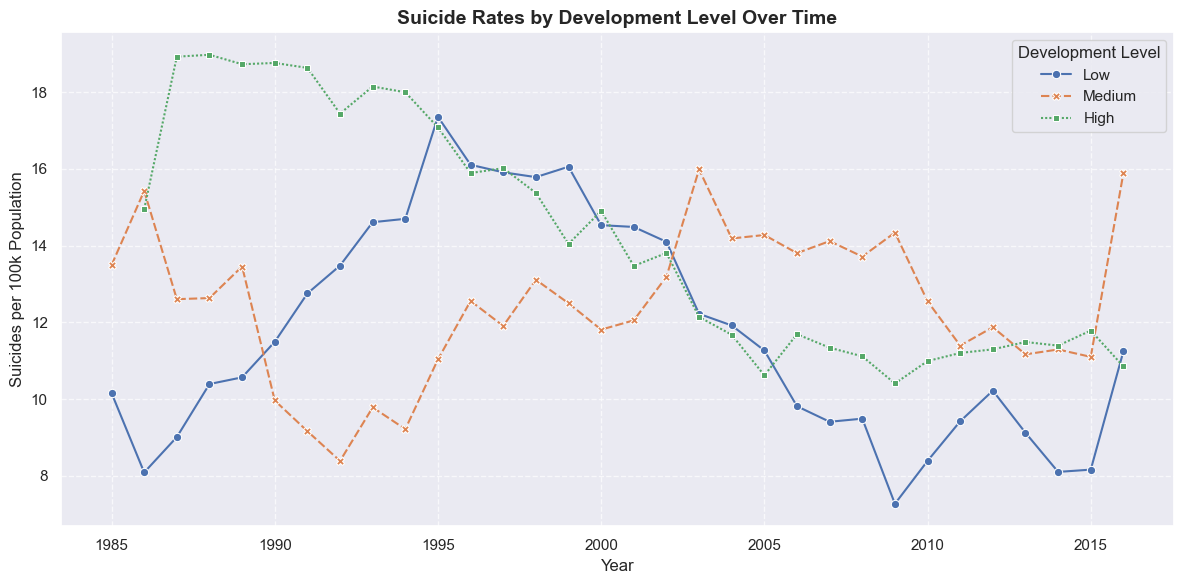

In [163]:
# Plot development level trends:
plt.figure(figsize=(12, 6))
sns.lineplot(data=development_analysis, x='year', y='suicides/100kpop', 
             hue='development_level', style='development_level', markers=True)
plt.title('Suicide Rates by Development Level Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Development Level')
plt.tight_layout()
plt.show()

It shows suicide rates per 100k population across different development levels (`Low`, `Medium`, `High`) from 1985 to 2015. 

- High Development countries (green dotted line) started with the highest suicide rates (around 18 per 100k) in the late 1980s but showed a consistent declining trend over time.

- Medium Development countries (orange dashed line) maintained relatively stable rates between 12-14 per 100k, with some fluctuations and a notable spike around 2015.

- Low Development countries (blue solid line) showed the most variable pattern, with a significant increase in the mid-1990s (reaching around 17 per 100k) followed by a rapid decline.

By 2015, all three development levels converged to similar suicide rates (around 11-12 per 100k), suggesting that development level alone may not be a determining factor in suicide rates in recent years.

The data challenges the assumption that `higher development automatically leads to lower suicide rates`, as highly developed countries actually started with the highest rates before showing improvement.

In [165]:
# Analyze HDI impact:
# Create HDI categories
def categorize_hdi(hdi):
    if hdi < 0.55:
        return 'Low HDI'
    elif hdi < 0.7:
        return 'Medium HDI'
    elif hdi < 0.8:
        return 'High HDI'
    else:
        return 'Very High HDI'

data['hdi_category'] = data['HDIforyear'].apply(categorize_hdi)

# Calculate average suicide rates by HDI category
hdi_analysis = data.groupby('hdi_category')['suicides/100kpop'].agg(['mean', 'std']).round(2)
hdi_analysis

mean    std
hdi_category               
High HDI       10.20  16.80
Low HDI         8.54  10.05
Medium HDI      9.96  16.70
Very High HDI  16.18  20.95

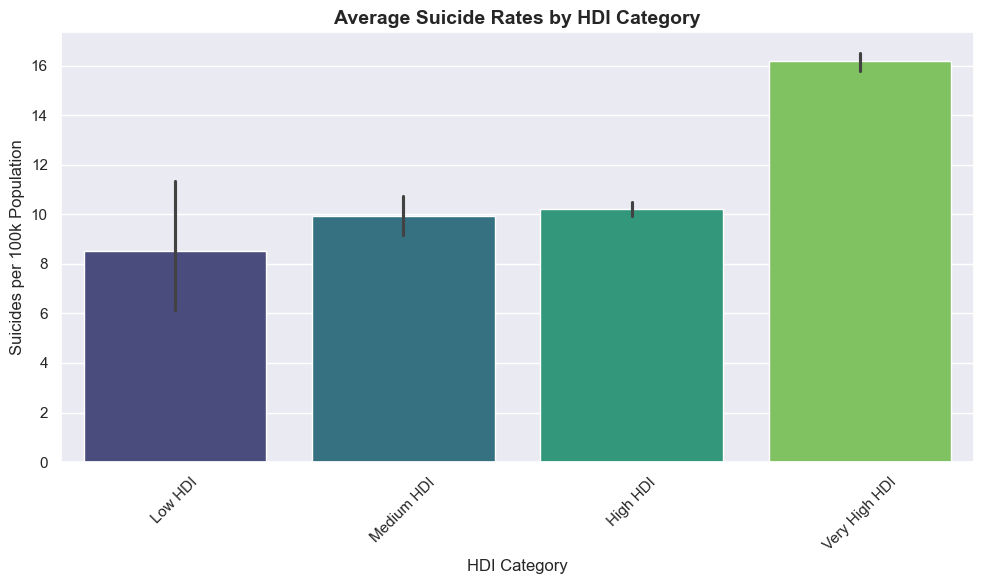

In [166]:
# Create bar plot for HDI categories
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='hdi_category', y='suicides/100kpop', 
            order=['Low HDI', 'Medium HDI', 'High HDI', 'Very High HDI'],
            palette='viridis')
plt.title('Average Suicide Rates by HDI Category', fontsize=14, fontweight='bold')
plt.xlabel('HDI Category')
plt.ylabel('Suicides per 100k Population')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It shows the `average suicide rates per 100k population` across different HDI (Human Development Index) categories:

1. **Low HDI**: Has the lowest suicide rates (~8 per 100k), possibly due to underreporting or cultural factors or something else that is outside the scope of the dataset.

2. **Medium and High HDI**: Show moderate rates (~10-12 per 100k), indicating a slight increase with development.

3. **Very High HDI**: Surprisingly has the highest suicide rates (~16 per 100k), suggesting that higher development does not necessarily reduce suicide rates.

Higher HDI correlates with higher suicide rates, possibly due to societal pressures, mental health challenges, or better reporting in developed nations.

In [167]:
# Statistical Analysis
print("\nCorrelation Analysis:")
print("-" * 50)
correlations = data[['suicides/100kpop', 'gdp_per_capita()', 'HDIforyear']].corr()['suicides/100kpop'].round(3)
print(correlations)


Correlation Analysis:
--------------------------------------------------
suicides/100kpop    1.000
gdp_per_capita()    0.002
HDIforyear          0.129
Name: suicides/100kpop, dtype: float64


In [168]:
# Decade-wise analysis:
data['decade'] = (data['year'] // 10) * 10
decade_analysis = data.groupby('decade').agg({
    'suicides/100kpop': 'mean',
    'gdp_per_capita()': 'mean',
    'HDIforyear': 'mean'
}).round(2)

print("\nDecade-wise Development Metrics:")
print("-" * 50)
print(decade_analysis)


Decade-wise Development Metrics:
--------------------------------------------------
        suicides/100kpop  gdp_per_capita()  HDIforyear
decade                                                
1980               12.10           8365.83        0.76
1990               14.38          11611.64        0.77
2000               12.63          18365.92        0.77
2010               11.21          26345.85        0.80


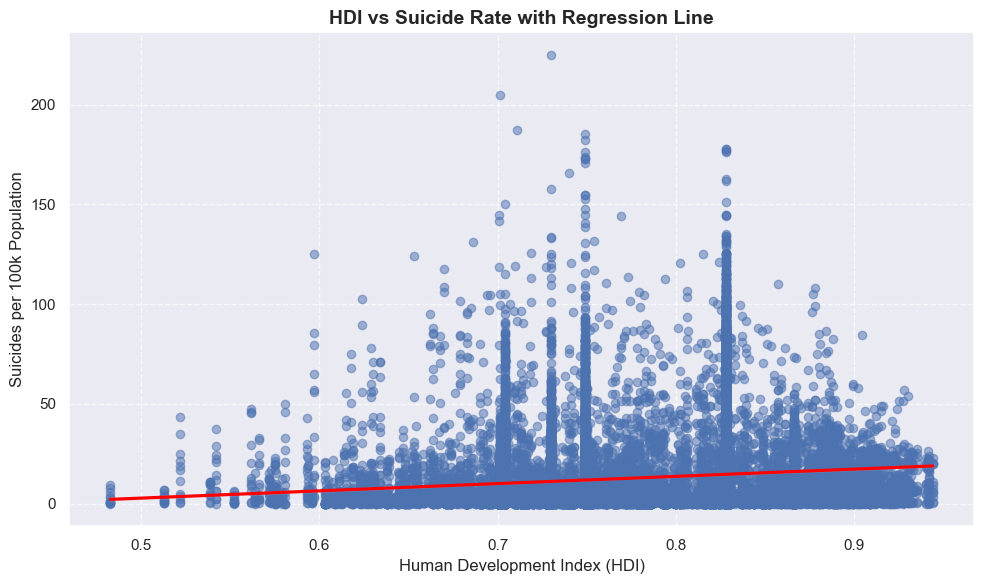

In [169]:
# Create scatter plot with regression line for HDI vs Suicide Rate
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='HDIforyear', y='suicides/100kpop', 
            scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('HDI vs Suicide Rate with Regression Line', fontsize=14, fontweight='bold')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Suicides per 100k Population')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This scatter plot with a regression line shows the relationship between `HDI` (Human Development Index) and `suicide rates per 100k population`:

1. **Trend**: The regression line indicates a weak positive correlation, suggesting that higher HDI is slightly associated with higher suicide rates.

2. **Outliers**: There are significant outliers with very high suicide rates, even at high HDI levels.

Indicates, `Higher development (HDI)` does not necessarily reduce suicide rates, likely due to societal pressures or better reporting in developed nations or something else that is outside the scope of this dataset.

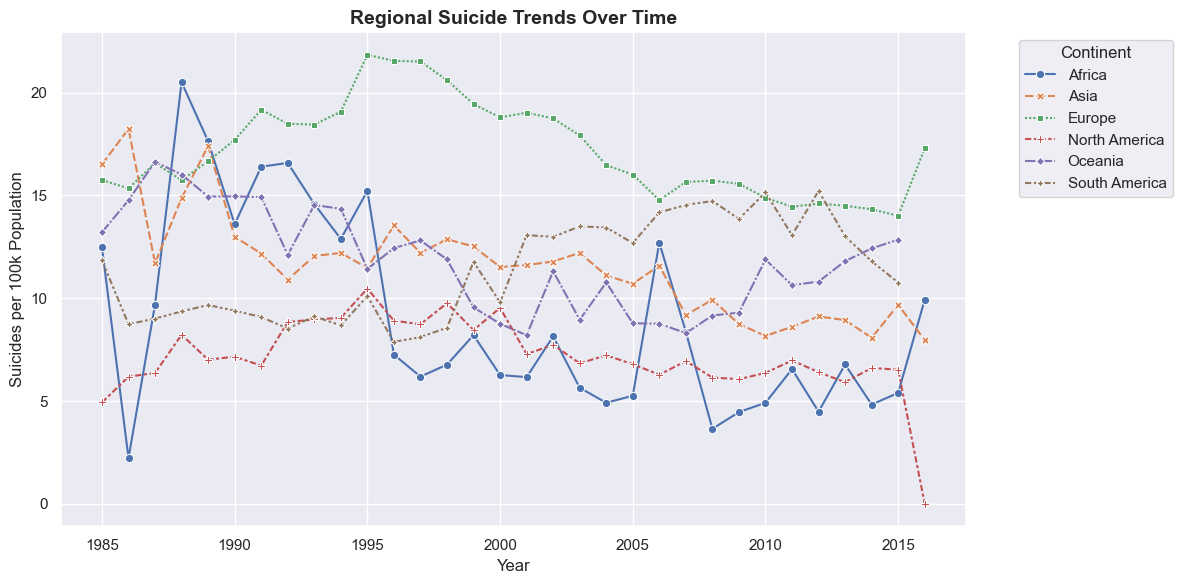

In [170]:
# Regional Development Analysis
regional_trends = data.groupby(['continent', 'year']).agg({
    'suicides/100kpop': 'mean',
    'gdp_per_capita()': 'mean',
    'HDIforyear': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=regional_trends, x='year', y='suicides/100kpop', 
             hue='continent', style='continent', markers=True)
plt.title('Regional Suicide Trends Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

It shows **regional suicide trends over time (1985–2015)** across six continents:

1. **Europe**:
   - Consistently has the highest suicide rates, peaking in the 1990s and gradually declining after 2000.
   - Likely due to socio-economic factors, cultural norms, and better reporting mechanisms or some other factors which are out of the scope of our dataset.

2. **Africa**:
   - Displays the lowest suicide rates, but the trend is highly variable.
   - This could be due to underreporting, cultural stigma, or lack of reliable data.

3. **Asia**:
   - Moderate suicide rates with fluctuations, showing a slight decline after 2000.
   - Economic growth and mental health awareness may have contributed to the decline.

4. **North America**:
   - Relatively stable rates, with a slight decline over time.
   - Likely reflects better mental health resources and interventions.

5. **Oceania**:
   - Moderate rates with minor fluctuations, showing a slight decline in recent years.

6. **South America**:
   - Moderate rates with a gradual decline, indicating improvements in mental health awareness and interventions.


## **Suggestions for the Policy Makers:**

1. **Targeted Mental Health Programs**:
   - Focus on **Europe** and **Asia**, where suicide rates are higher, by implementing region-specific mental health campaigns and support systems.

2. **Improve Data Collection**:
   - Enhance suicide reporting mechanisms in **Africa** to address underreporting and understand the true extent of the issue.

3. **Community-Based Interventions**:
   - Promote community support systems in **South America** and **Oceania** to sustain the declining trends.

4. **Economic and Social Support**:
   - Address socio-economic stressors in **Europe** and **Asia**, such as unemployment and financial pressures, which are linked to higher suicide rates.

5. **Global Collaboration**:
   - Encourage cross-continental collaboration to share best practices in suicide prevention, particularly between regions with declining trends (e.g., **North America**) and those with higher rates (e.g., **Europe**).